HR Analytics Project- Understanding the Attrition in HR
Project Description
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?
HR Analytics
Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.
Attrition in HR
Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.
How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.
Attrition affecting Companies
A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.


Dataset Link-
•	https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics



# Importing libraries

In [132]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.preprocessing import power_transform
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics  import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

# Importing and Reading the Dataset


In [2]:
HR=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
HR

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

Asper the dataset available following observations re made
1)Eemployees who are working in an organization. 
2)Contains both dependent and independent varaibles 
3)Contains both categorical and numerical data.
4)"Attrition" is target variable which contans two classes.
5)"Classification type" problem  we need to increase the attrition of the employees.

In [3]:
# checking shape of dataset
HR.shape

(1470, 35)

Dataset Contains 1470 rows × 35 columns

In [4]:
# checking the  columns
HR.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
# checking the Information of dataset
HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Dataset contains Int-26,object-9 values

In [6]:
# checking string values
HR.columns = HR.columns.str.replace(' ', '_')
HR.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Doesnot contain any String Values

In [7]:
# checking Null Values columns
HR.isnull().sum()     

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

No Null Values

In [8]:
# Checking unique values in each column
HR.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

Unique values are  present in each columns.
some Values wont efect the model building hence we can drop those column later 

columnsEmployeeCount,over18 and StandardHours have only 1 count . Also EmployeeNumber is taken on the basis of unique ID of the employees so we can drop this too.

In [9]:
HR

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [10]:
HR.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool>

In [11]:
#dropping duplicate rows and resetting index
HR=HR.drop_duplicates()
print('Number of rows after removing duplicates=', len(HR))

Number of rows after removing duplicates= 1470


<AxesSubplot:>

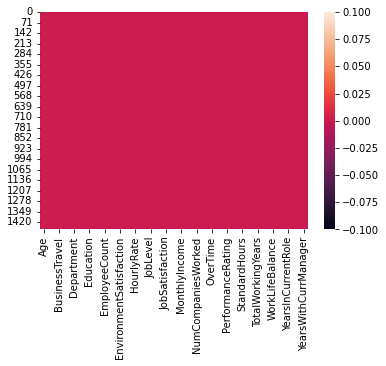

In [12]:
sns.heatmap(HR.isnull())

In [13]:
HR.duplicated().sum()

0

Univariate Analysis 'Subscribed' variable

In [14]:
#Frequency of 'Attrition'
HR['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

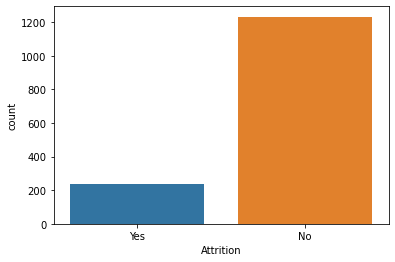

In [15]:
# Plotting the 'subscribed' frequency
sns.countplot(data=HR,x='Attrition')

In [16]:
#Normalizing the frequency table of 'Attrition' variable
HR['Attrition'].value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

In [17]:
#Frequency table
HR['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

# EDA

# Encoding

In [18]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in HR.columns:
    if HR[i].dtypes=='object':
        HR[i]=enc.fit_transform(HR[i].values.reshape(-1,1))
HR.tail(20)

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
1450   35        0.0             2.0       1146         0.0                26   
1451   38        0.0             2.0        345         2.0                10   
1452   50        1.0             1.0        878         2.0                 1   
1453   36        0.0             2.0       1120         2.0                11   
1454   45        0.0             2.0        374         2.0                20   
1455   40        0.0             2.0       1322         1.0                 2   
1456   35        0.0             1.0       1199         1.0                18   
1457   40        0.0             2.0       1194         1.0                 2   
1458   35        0.0             2.0        287         1.0                 1   
1459   29        0.0             2.0       1378         1.0                13   
1460   29        0.0             2.0        468         1.0                28   
1461   50        1.0             2.0        410         2.0                28   
1462   39        0.0             2.0        722         2.0                24   
1463   31        0.0             0.0        325         1.0                 5   
1464   26        0.0             2.0       1167         2.0                 5   
1465   36        0.0             1.0        884         1.0                23   
1466   39        0.0             2.0        613         1.0                 6   
1467   27        0.0             2.0        155         1.0                 4   
1468   49        0.0             1.0       1023         2.0                 2   
1469   34        0.0             2.0        628         1.0                 8   

      Education  EducationField  EmployeeCount  EmployeeNumber  ...  \
1450          4             1.0              1            2040  ...   
1451          2             1.0              1            2041  ...   
1452          4             1.0              1            2044  ...   
1453          4             2.0              1            2045  ...   
1454          3             1.0              1            2046  ...   
1455          4             1.0              1            2048  ...   
1456          4             1.0              1            2049  ...   
1457          4             3.0              1            2051  ...   
1458          4             1.0              1            2052  ...   
1459          2             4.0              1            2053  ...   
1460          4             3.0              1            2054  ...   
1461          3             2.0              1            2055  ...   
1462          1             2.0              1            2056  ...   
1463          3             3.0              1            2057  ...   
1464          3             4.0              1            2060  ...   
1465          2             3.0              1            2061  ...   
1466          1             3.0              1            2062  ...   
1467          3             1.0              1            2064  ...   
1468          3             3.0              1            2065  ...   
1469          3             3.0              1            2068  ...   

      RelationshipSatisfaction  StandardHours  StockOptionLevel  \
1450                         3             80                 0   
1451                         3             80                 1   
1452                         4             80                 2   
1453                         1             80                 1   
1454                         3             80                 0   
1455                         4             80                 0   
1456                         4             80                 2   
1457                         2             80                 3   
1458                         4             80                 1   
1459                         1             80                 1   
1460                         2             80                 0   
1461    

In [19]:
HR.dtypes

Age                           int64
Attrition                   float64
BusinessTravel              float64
DailyRate                     int64
Department                  float64
DistanceFromHome              int64
Education                     int64
EducationField              float64
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                      float64
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                     float64
JobSatisfaction               int64
MaritalStatus               float64
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                      float64
OverTime                    float64
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours                 int64
StockOptionLevel            

All object values are converted to Int values using Ordinal Encoder

# Visualization of Data using Graphical Representation
Uivarate,Bivarate,Multivarate

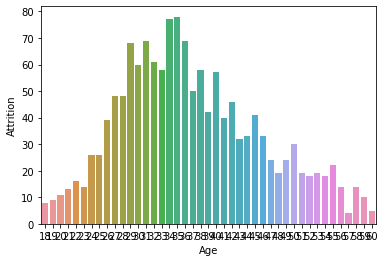

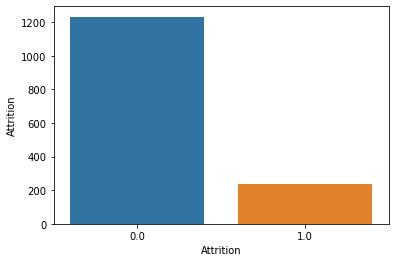

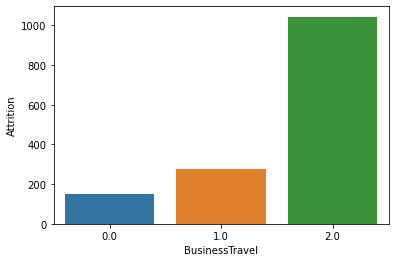

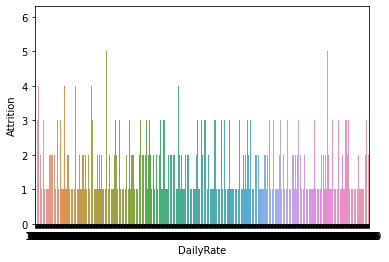

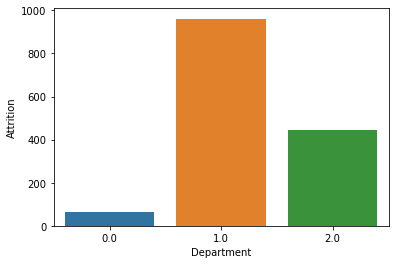

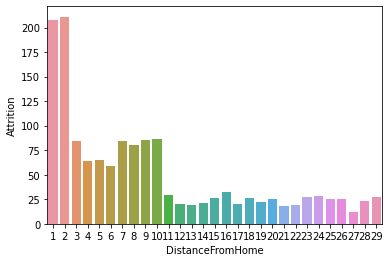

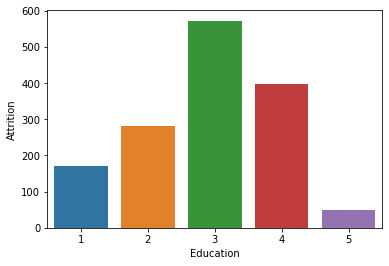

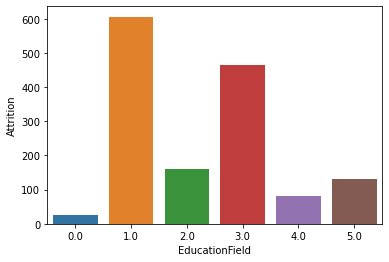

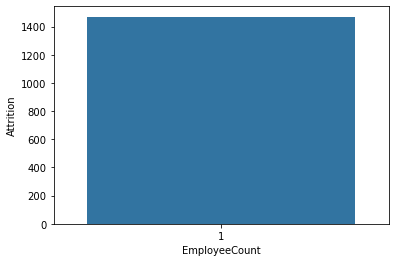

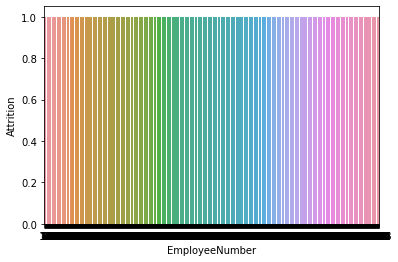

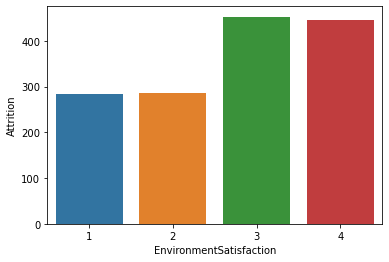

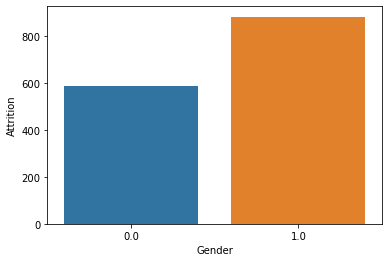

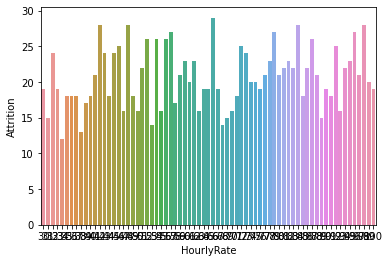

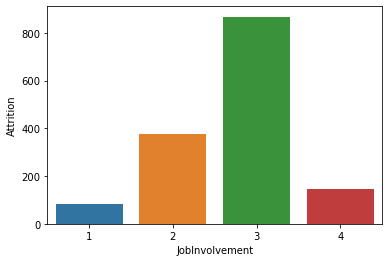

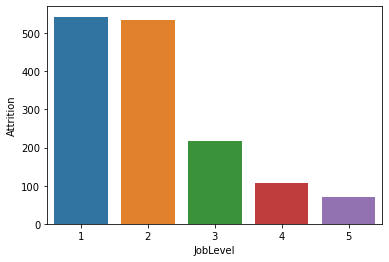

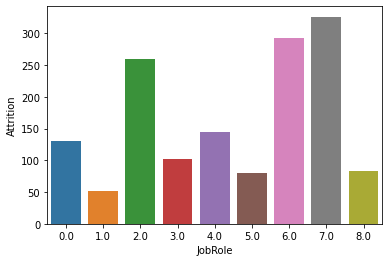

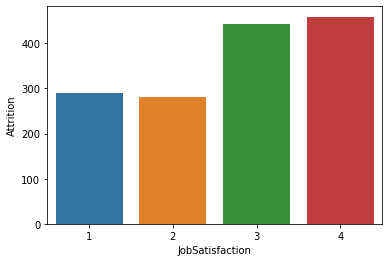

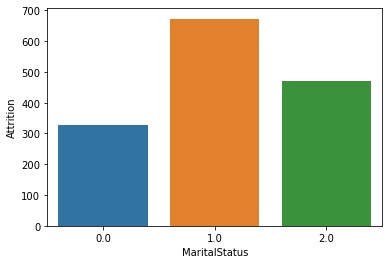

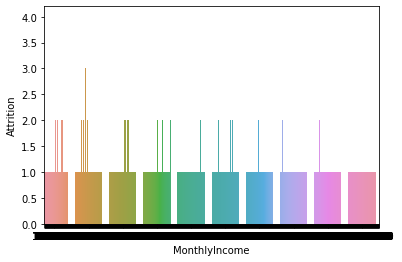

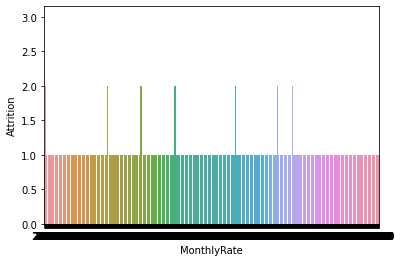

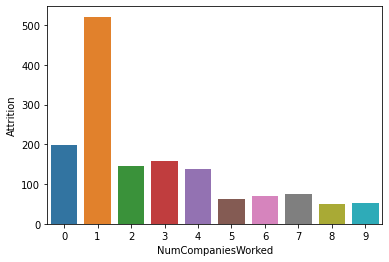

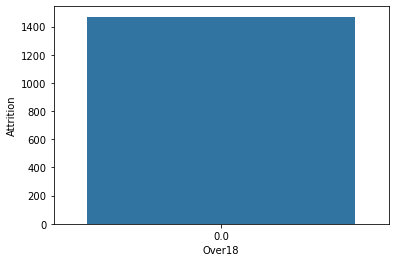

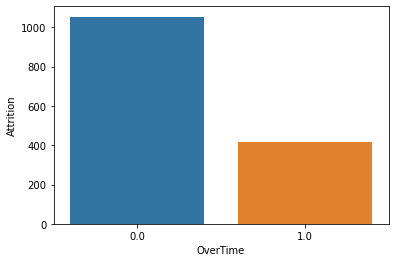

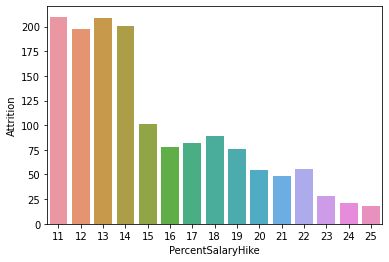

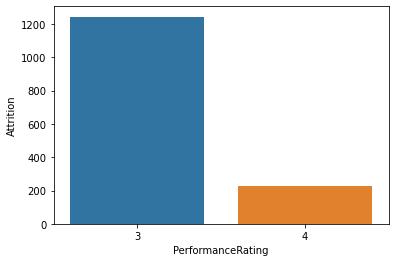

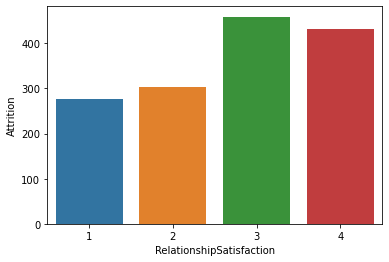

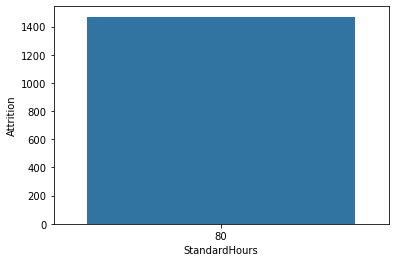

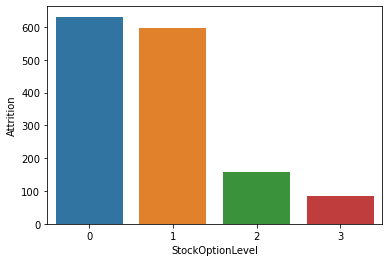

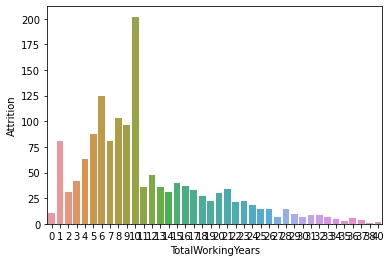

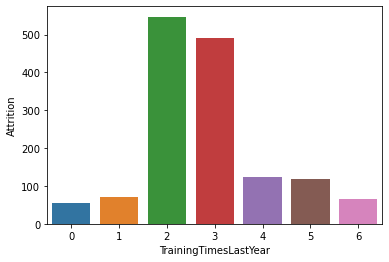

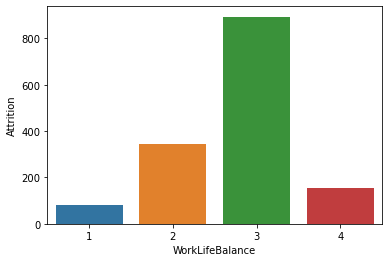

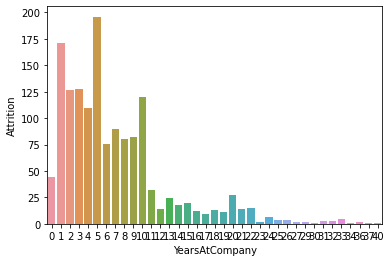

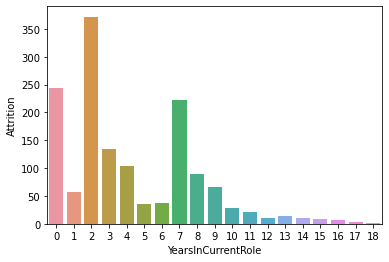

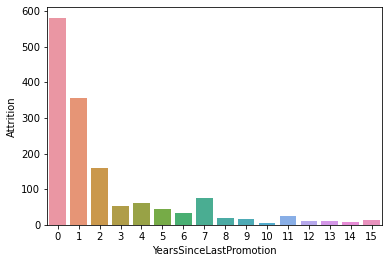

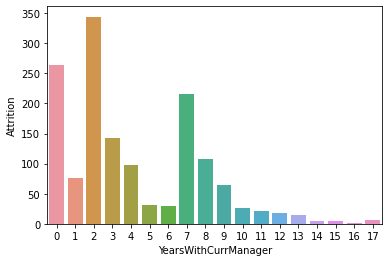

In [20]:
for column in HR.columns:
    sns.countplot(x=column, data=HR)
    plt.xlabel(column)
    plt.ylabel('Attrition')
    plt.show()

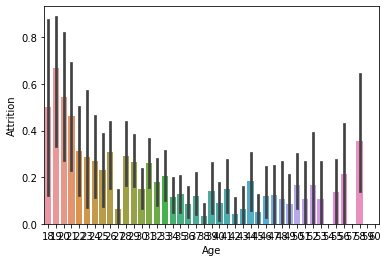

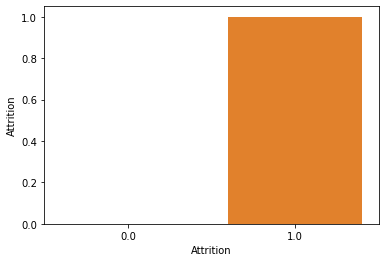

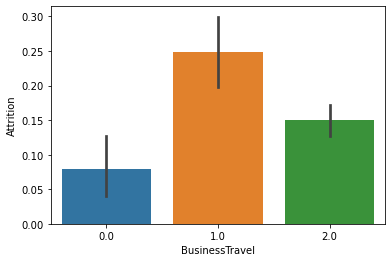

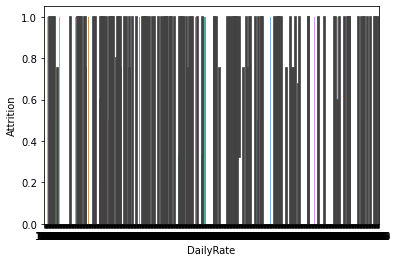

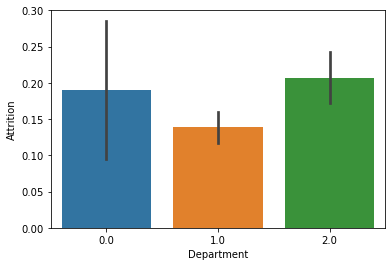

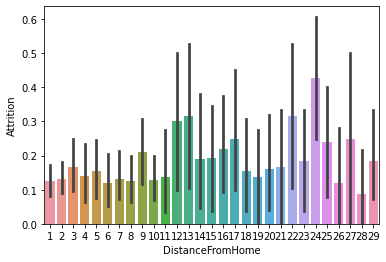

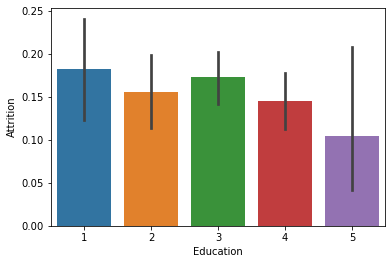

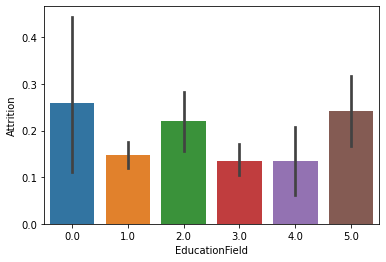

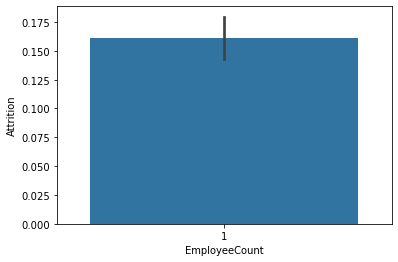

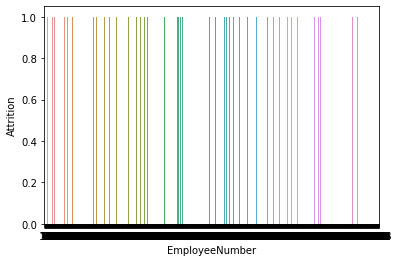

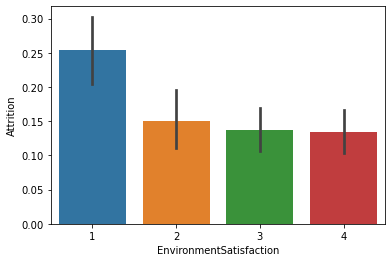

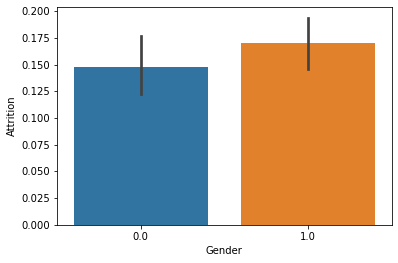

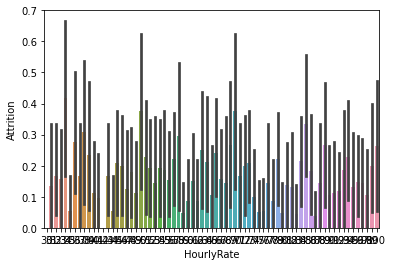

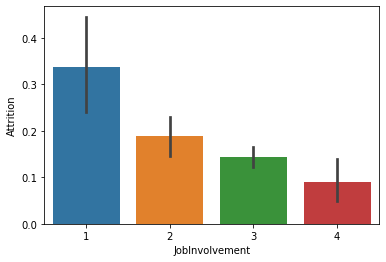

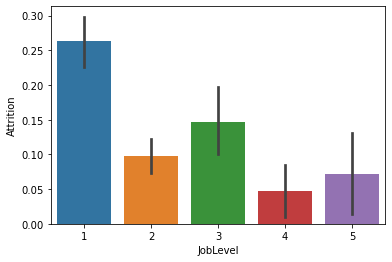

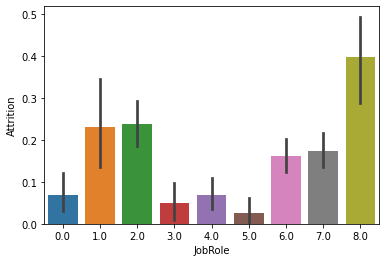

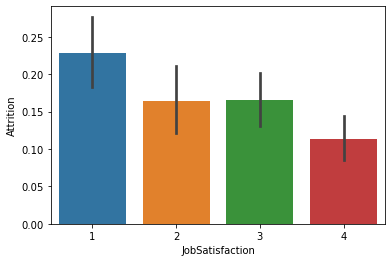

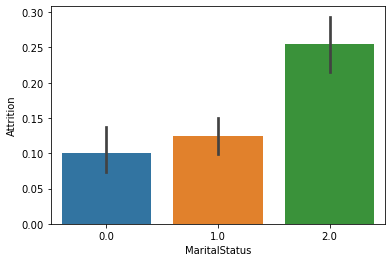

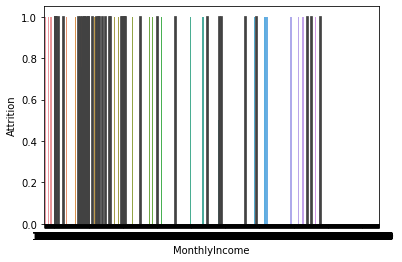

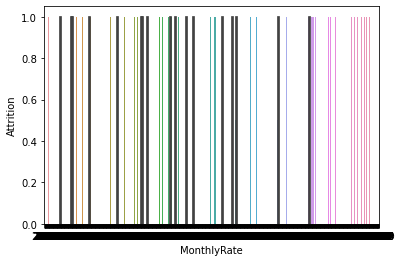

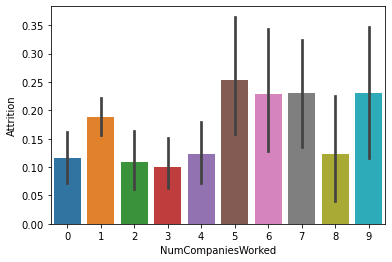

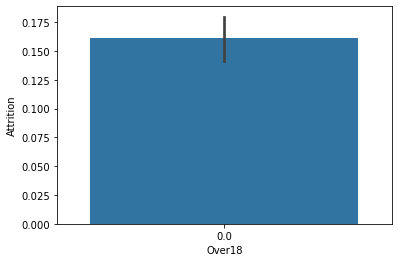

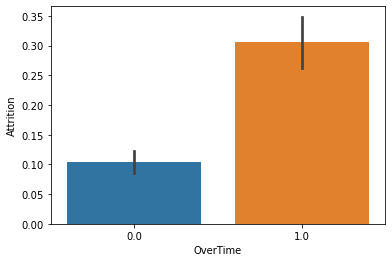

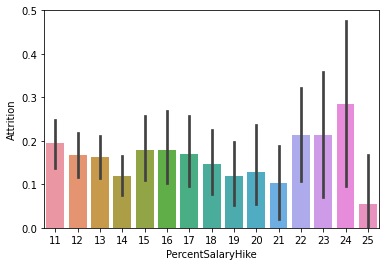

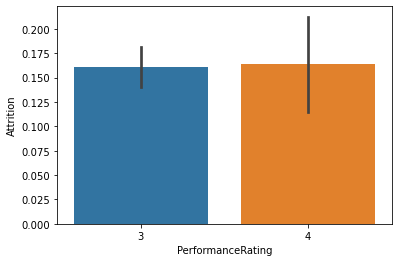

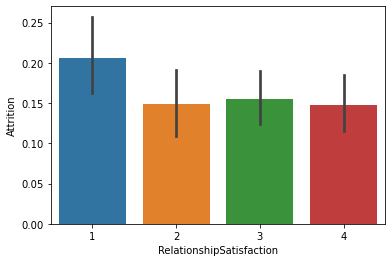

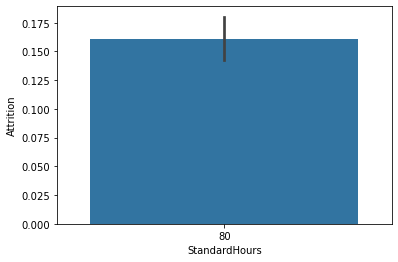

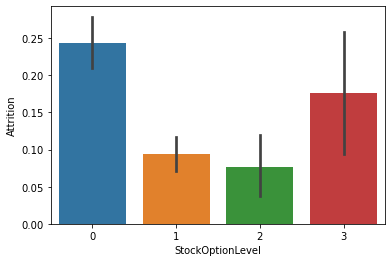

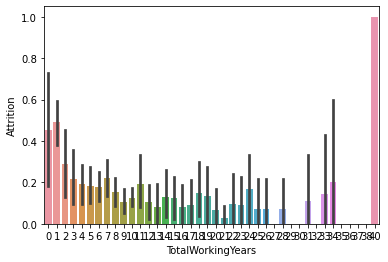

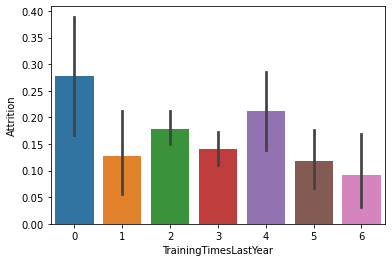

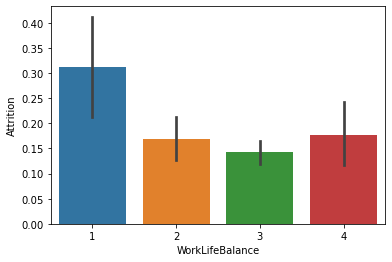

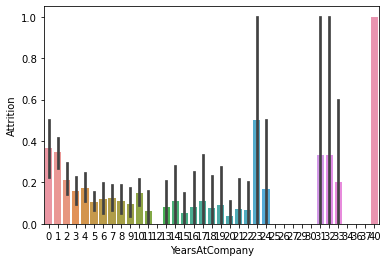

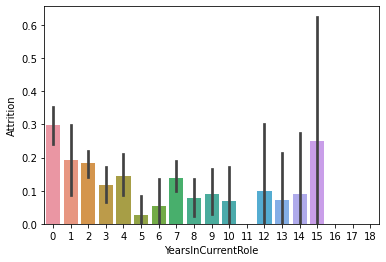

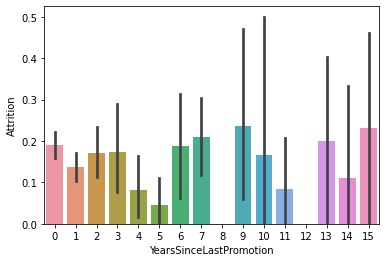

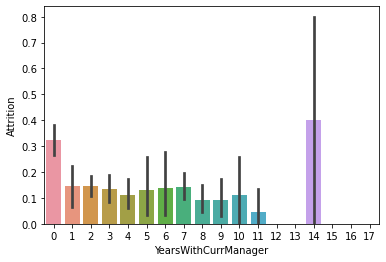

In [22]:
for column in HR.columns:
    sns.barplot(x=column,y='Attrition',data=HR)
    plt.xlabel(column)
    plt.show()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'BusinessTravel'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'Department'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>],
       [<AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EducationField'}>,
        <AxesSubplot:title={'center':'EmployeeCount'}>,
        <AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'Gender'}>],
       [<AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobRole'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MaritalStatus'}>],
       [<AxesSub

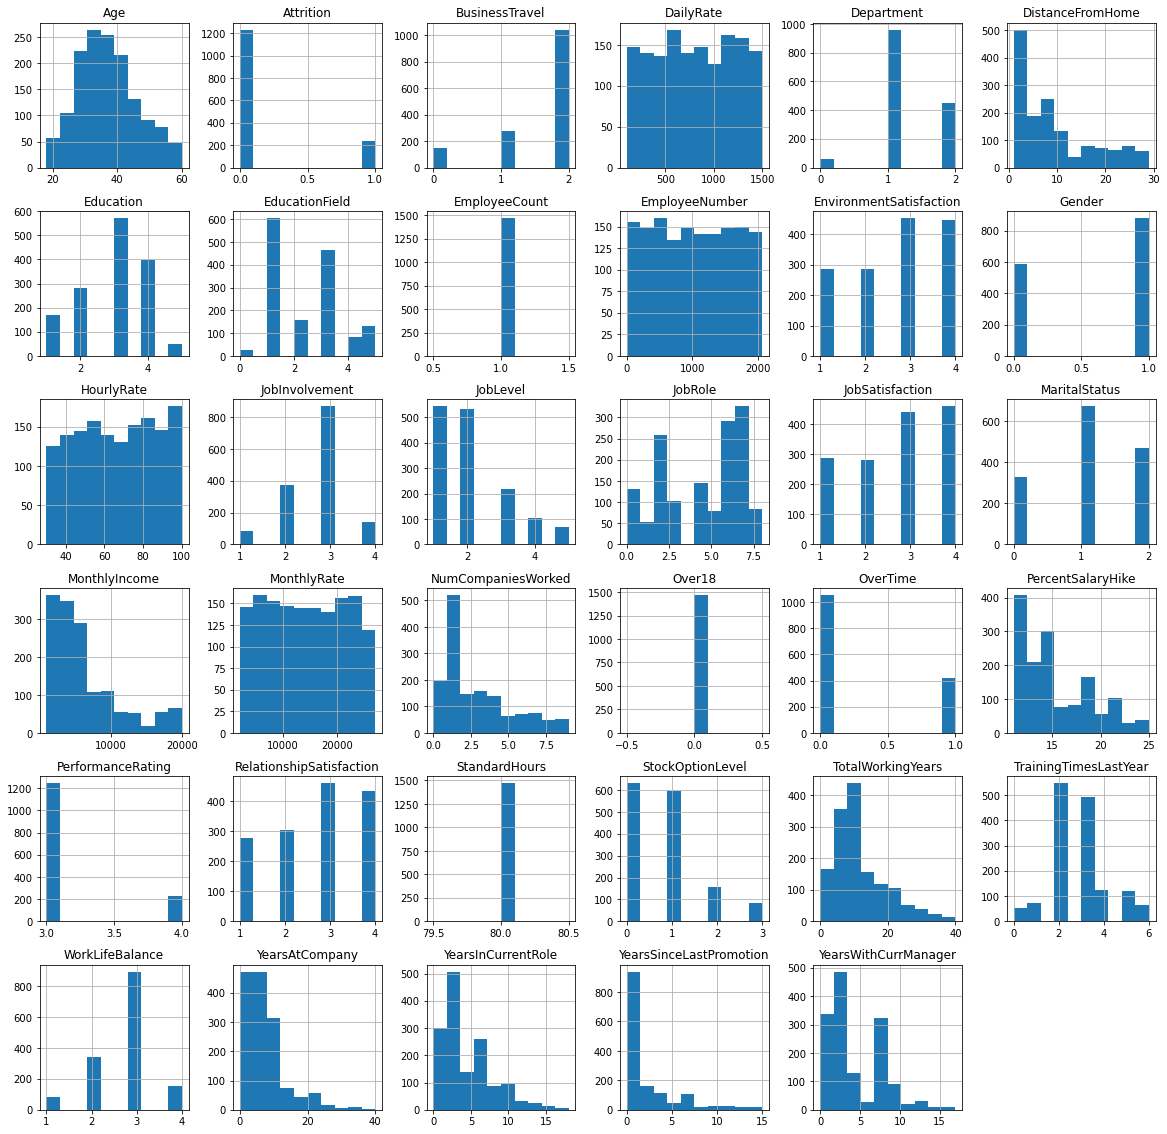

In [23]:
HR.hist(bins=10, figsize=(20,20))

#BIvarate 

<AxesSubplot:xlabel='BusinessTravel', ylabel='Attrition'>

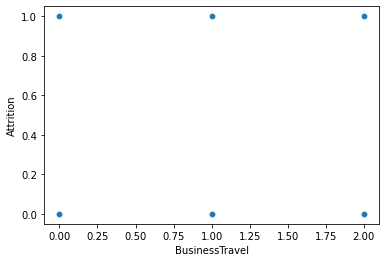

In [24]:
sns.scatterplot(x='BusinessTravel',y='Attrition',data=HR)

<AxesSubplot:xlabel='DailyRate', ylabel='Attrition'>

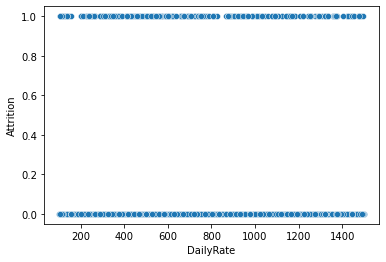

In [25]:
sns.scatterplot(x='DailyRate',y='Attrition',data=HR)

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Attrition'>

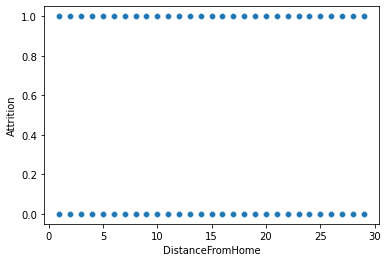

In [26]:
sns.scatterplot(x='DistanceFromHome',y='Attrition',data=HR)

<AxesSubplot:xlabel='Education', ylabel='Attrition'>

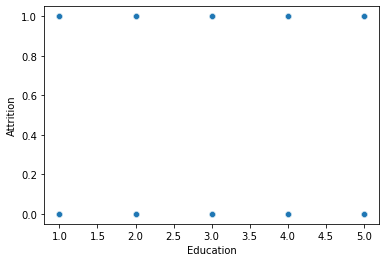

In [27]:
sns.scatterplot(x='Education',y='Attrition',data=HR)

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='Attrition'>

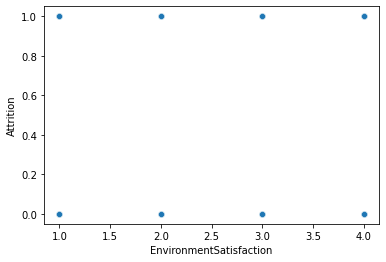

In [28]:
sns.scatterplot(x='EnvironmentSatisfaction',y='Attrition',data=HR)

<AxesSubplot:xlabel='Gender', ylabel='Attrition'>

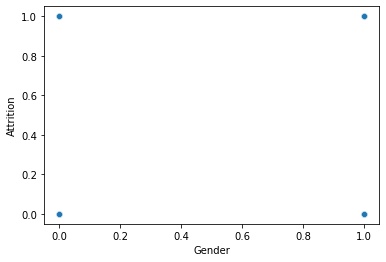

In [29]:
sns.scatterplot(x='Gender',y='Attrition',data=HR)

<AxesSubplot:xlabel='JobSatisfaction', ylabel='Attrition'>

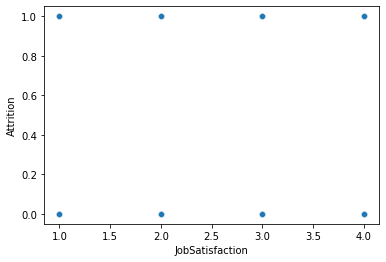

In [30]:
sns.scatterplot(x='JobSatisfaction',y='Attrition',data=HR)

<AxesSubplot:xlabel='MaritalStatus', ylabel='Attrition'>

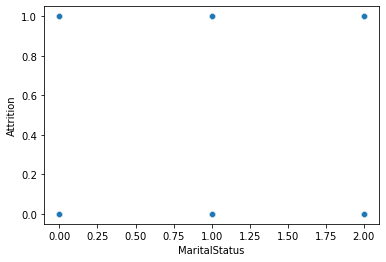

In [31]:
sns.scatterplot(x='MaritalStatus',y='Attrition',data=HR)

<AxesSubplot:xlabel='BusinessTravel', ylabel='Attrition'>

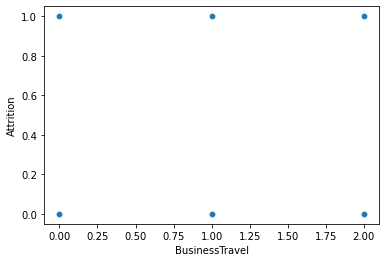

In [32]:
sns.scatterplot(x='BusinessTravel',y='Attrition',data=HR)

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='Attrition'>

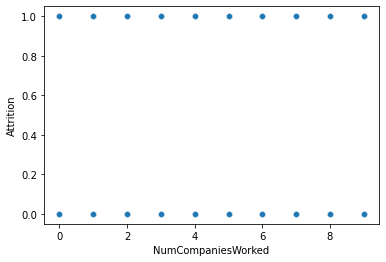

In [33]:
sns.scatterplot(x='NumCompaniesWorked',y='Attrition',data=HR)

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='Attrition'>

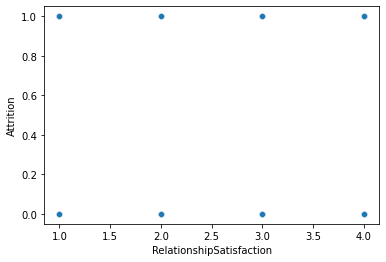

In [34]:
sns.scatterplot(x='RelationshipSatisfaction',y='Attrition',data=HR)

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='Attrition'>

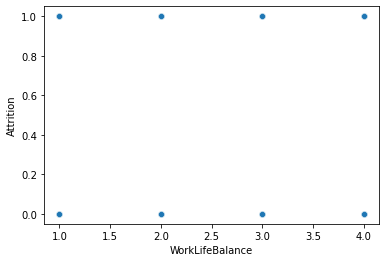

In [35]:
sns.scatterplot(x='WorkLifeBalance',y='Attrition',data=HR)

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='Attrition'>

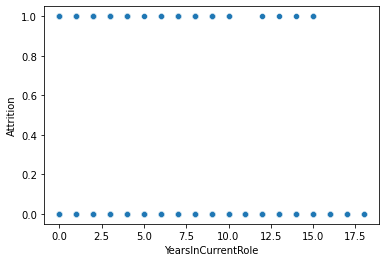

In [36]:
sns.scatterplot(x='YearsInCurrentRole',y='Attrition',data=HR)

<AxesSubplot:xlabel='StockOptionLevel', ylabel='Attrition'>

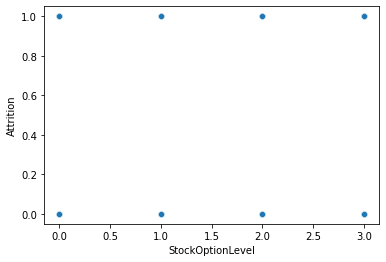

In [37]:
sns.scatterplot(x='StockOptionLevel',y='Attrition',data=HR)

Multivarate

<Figure size 1800x2160 with 0 Axes>

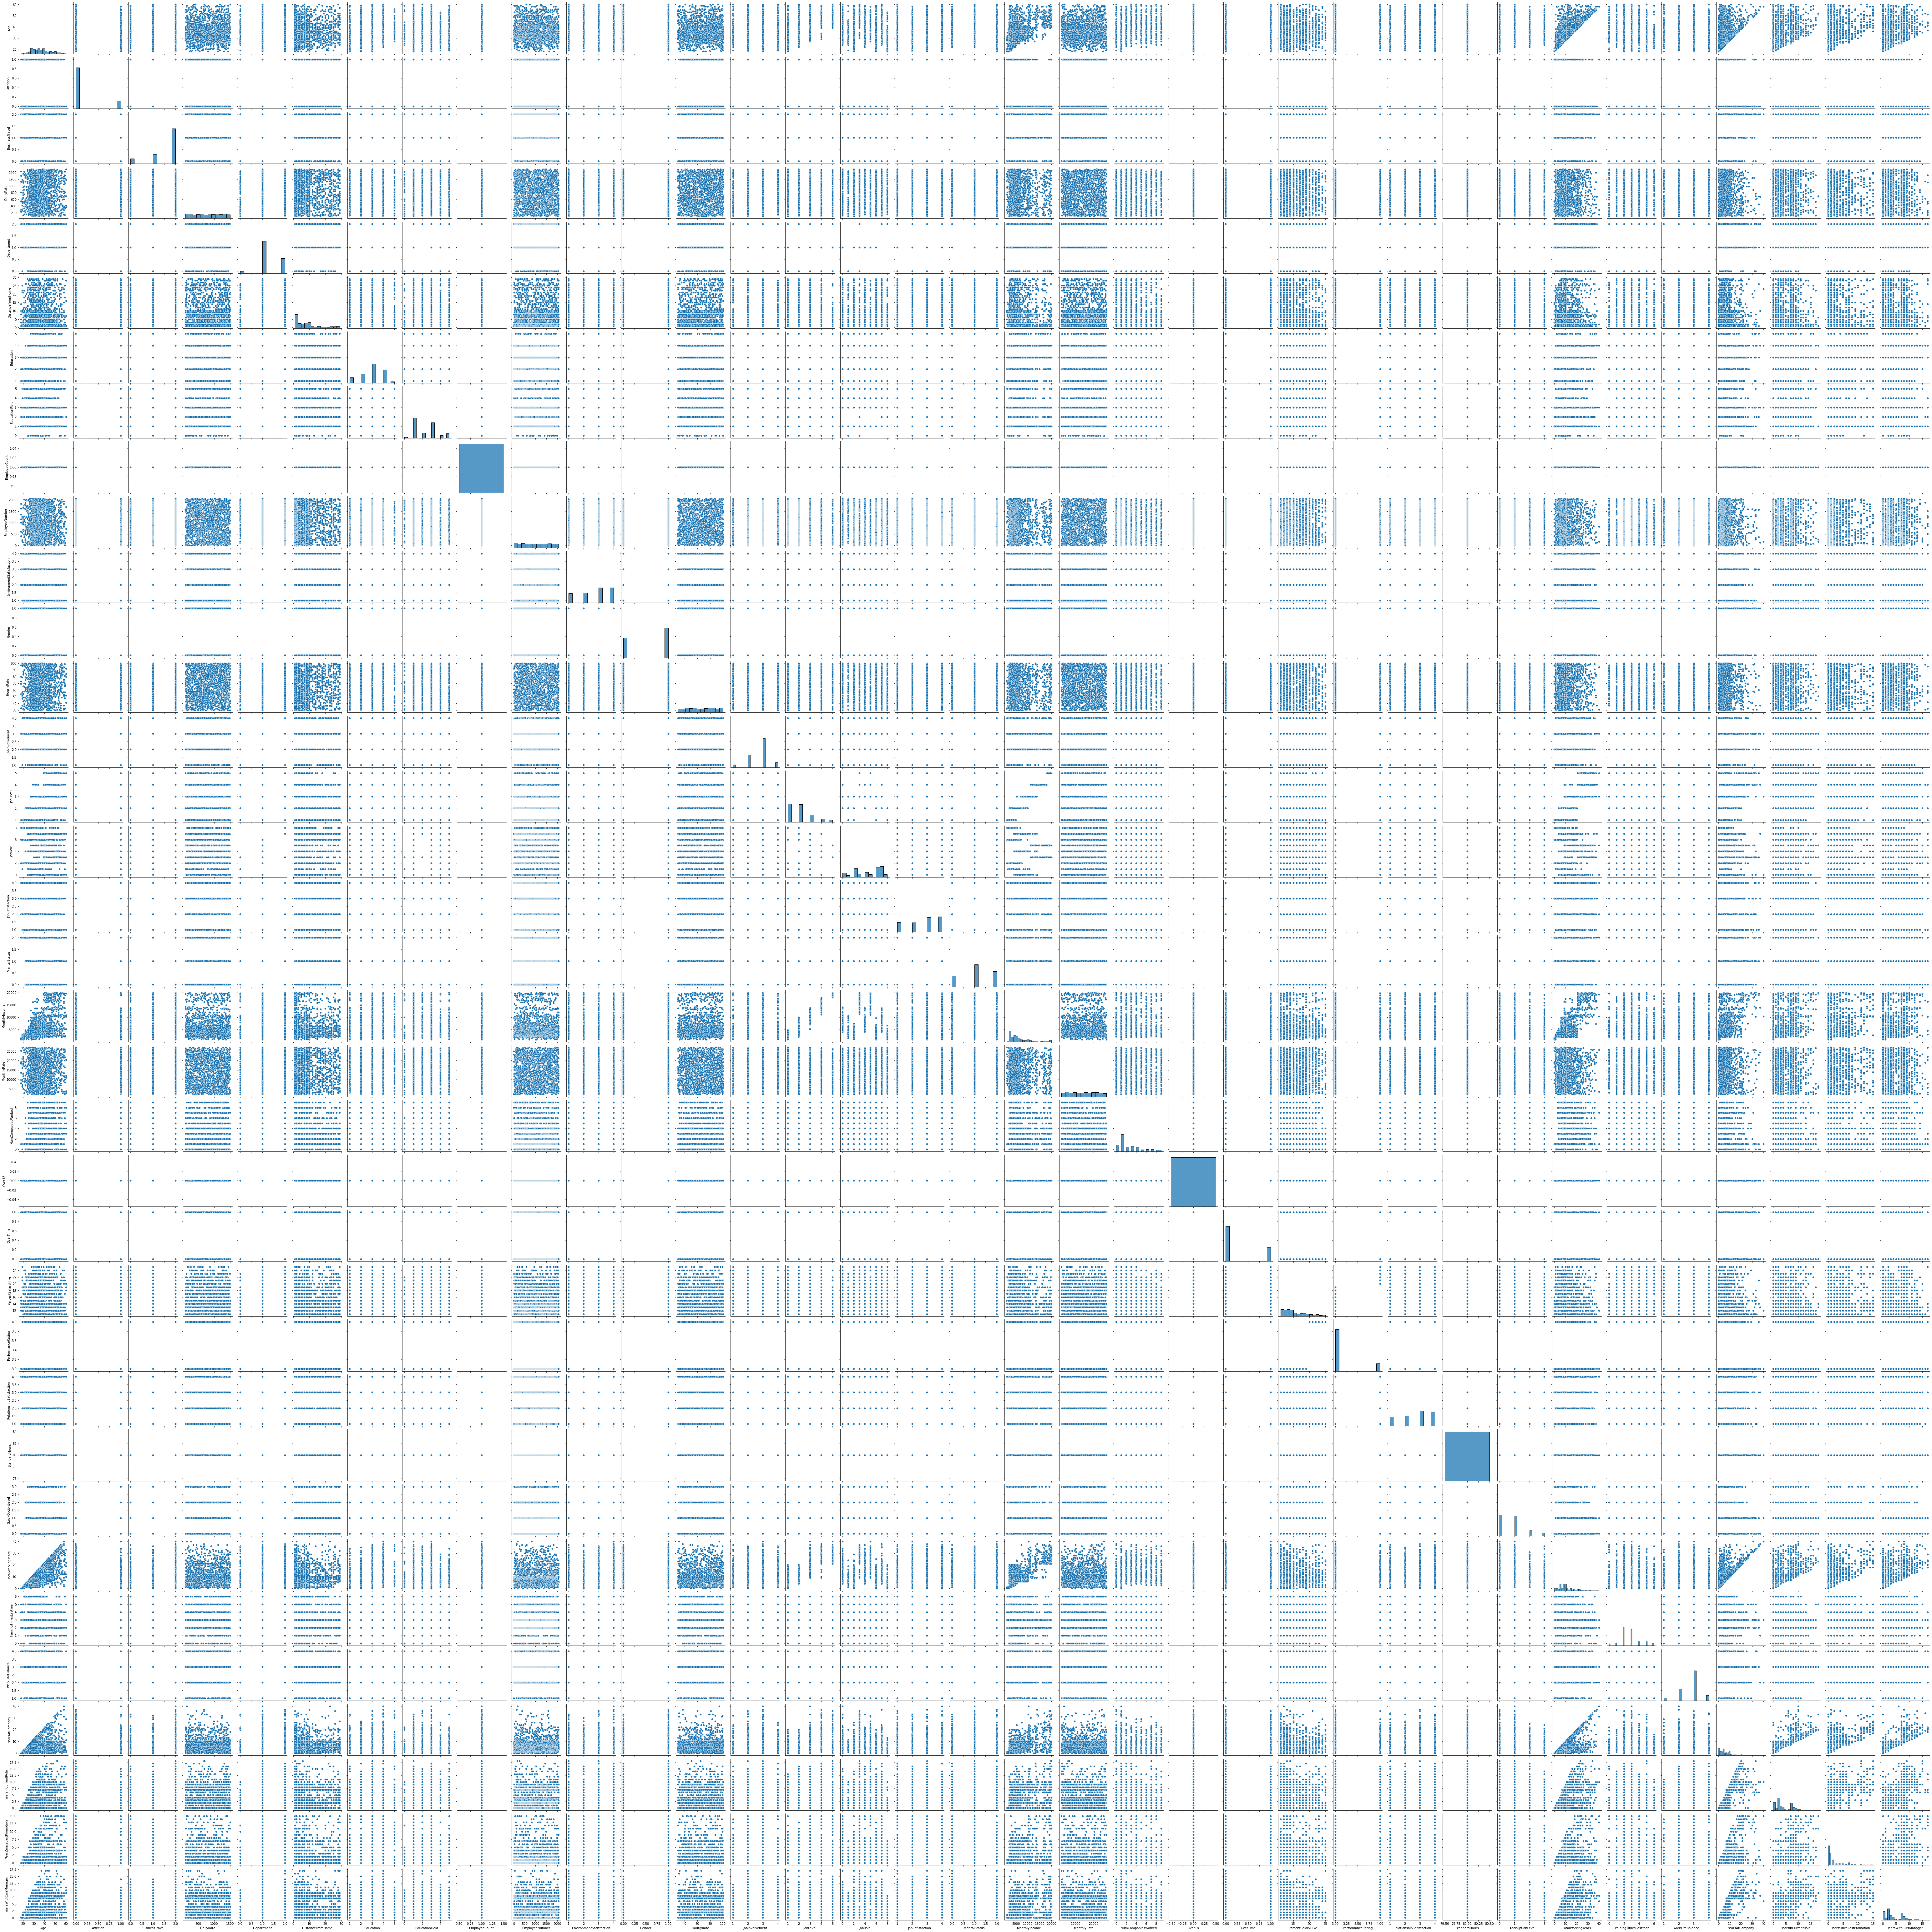

In [38]:
plt.figure(figsize=(25,30))
sns.pairplot(HR)
plt.show()

Following observations are made after Visualization of Data using Graphical Representation
Univariate Analysis

1)Maximum employees belongs to R&D department and 446 are working in the Sales department and  63 employees
works in HR department.
2)Most of the employees are from the Life Sciences background by Medical field and few employees are from human Resources field
3)male employees facing the attrition than the female employees.
4)Sales Executive jobs are more followed by Research Scientist and Laboratory Technician
5)Human Resources job roles are very less in numbers.
6)There are 45% of employees who are married, nearer to 32%(31.97%) are single remaining 22% are divorced.
7)1054 -work with in the given time and only 416- employees the assigned time.

Bivariate Analysis

1)Employees with higher age have less tendency to leave organization
2)80% of employees in HR department dont want to leave the organization and only 20% employees wants to leave. 
3)joblevel 5 dont want to leave , employees in the job level  facing attrition.
4)The attrition rate is high in singles followed by Married employees. 
5)Most of the employees in joblevel 4 have high percent of "No" attrition and very less percent for attrition "Yes".
6)Employees working with lower daily rate wants to leave the organization 
7)hourlyrate wont affect the attrition.
8)low Jobinvolvement levels wants to leave the organization.
9)Employees having high RelationshipSatisfaction are facing the attrition.


Multivariate Analysis

This pair plot  is plotted on the basis of target variable "Attrition". Here we can observe the relation between the features and label.

Some of the features have strong linear relationship and most of features are highly correlated with each other.

Some of the features have outliers and skewness

Now Lets See that counts of each columns

In [39]:
for i in HR.columns:
        print(HR[i].value_counts())
        print('*'*100)

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64
****************************************************************************************************
0.0    1233
1.0     237
Name: Attrition, dtype: int64
****************************************************************************************************
2.0    1043
1.0     277
0.0     150
Name: BusinessTravel, dtype: int64
****************************************************************************************************
691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64
********

<AxesSubplot:>

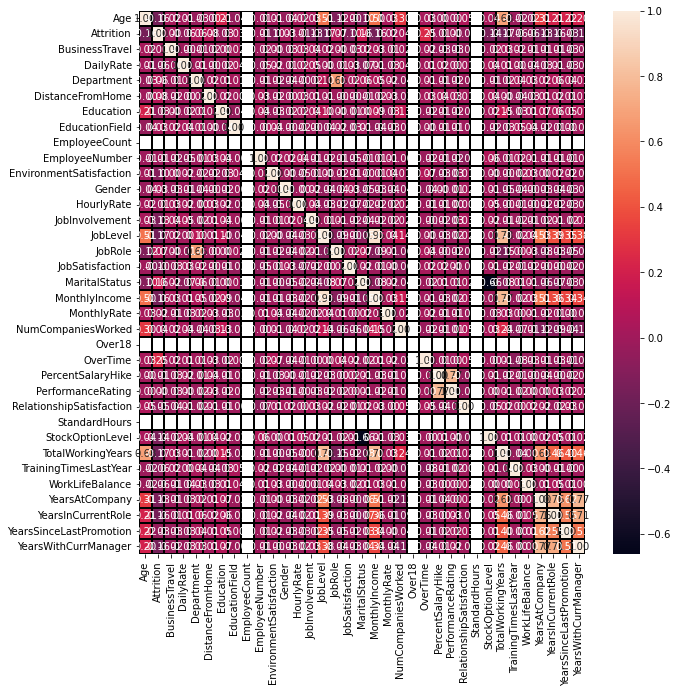

In [40]:
plt.figure(figsize = (10,10))
sns.heatmap(HR.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

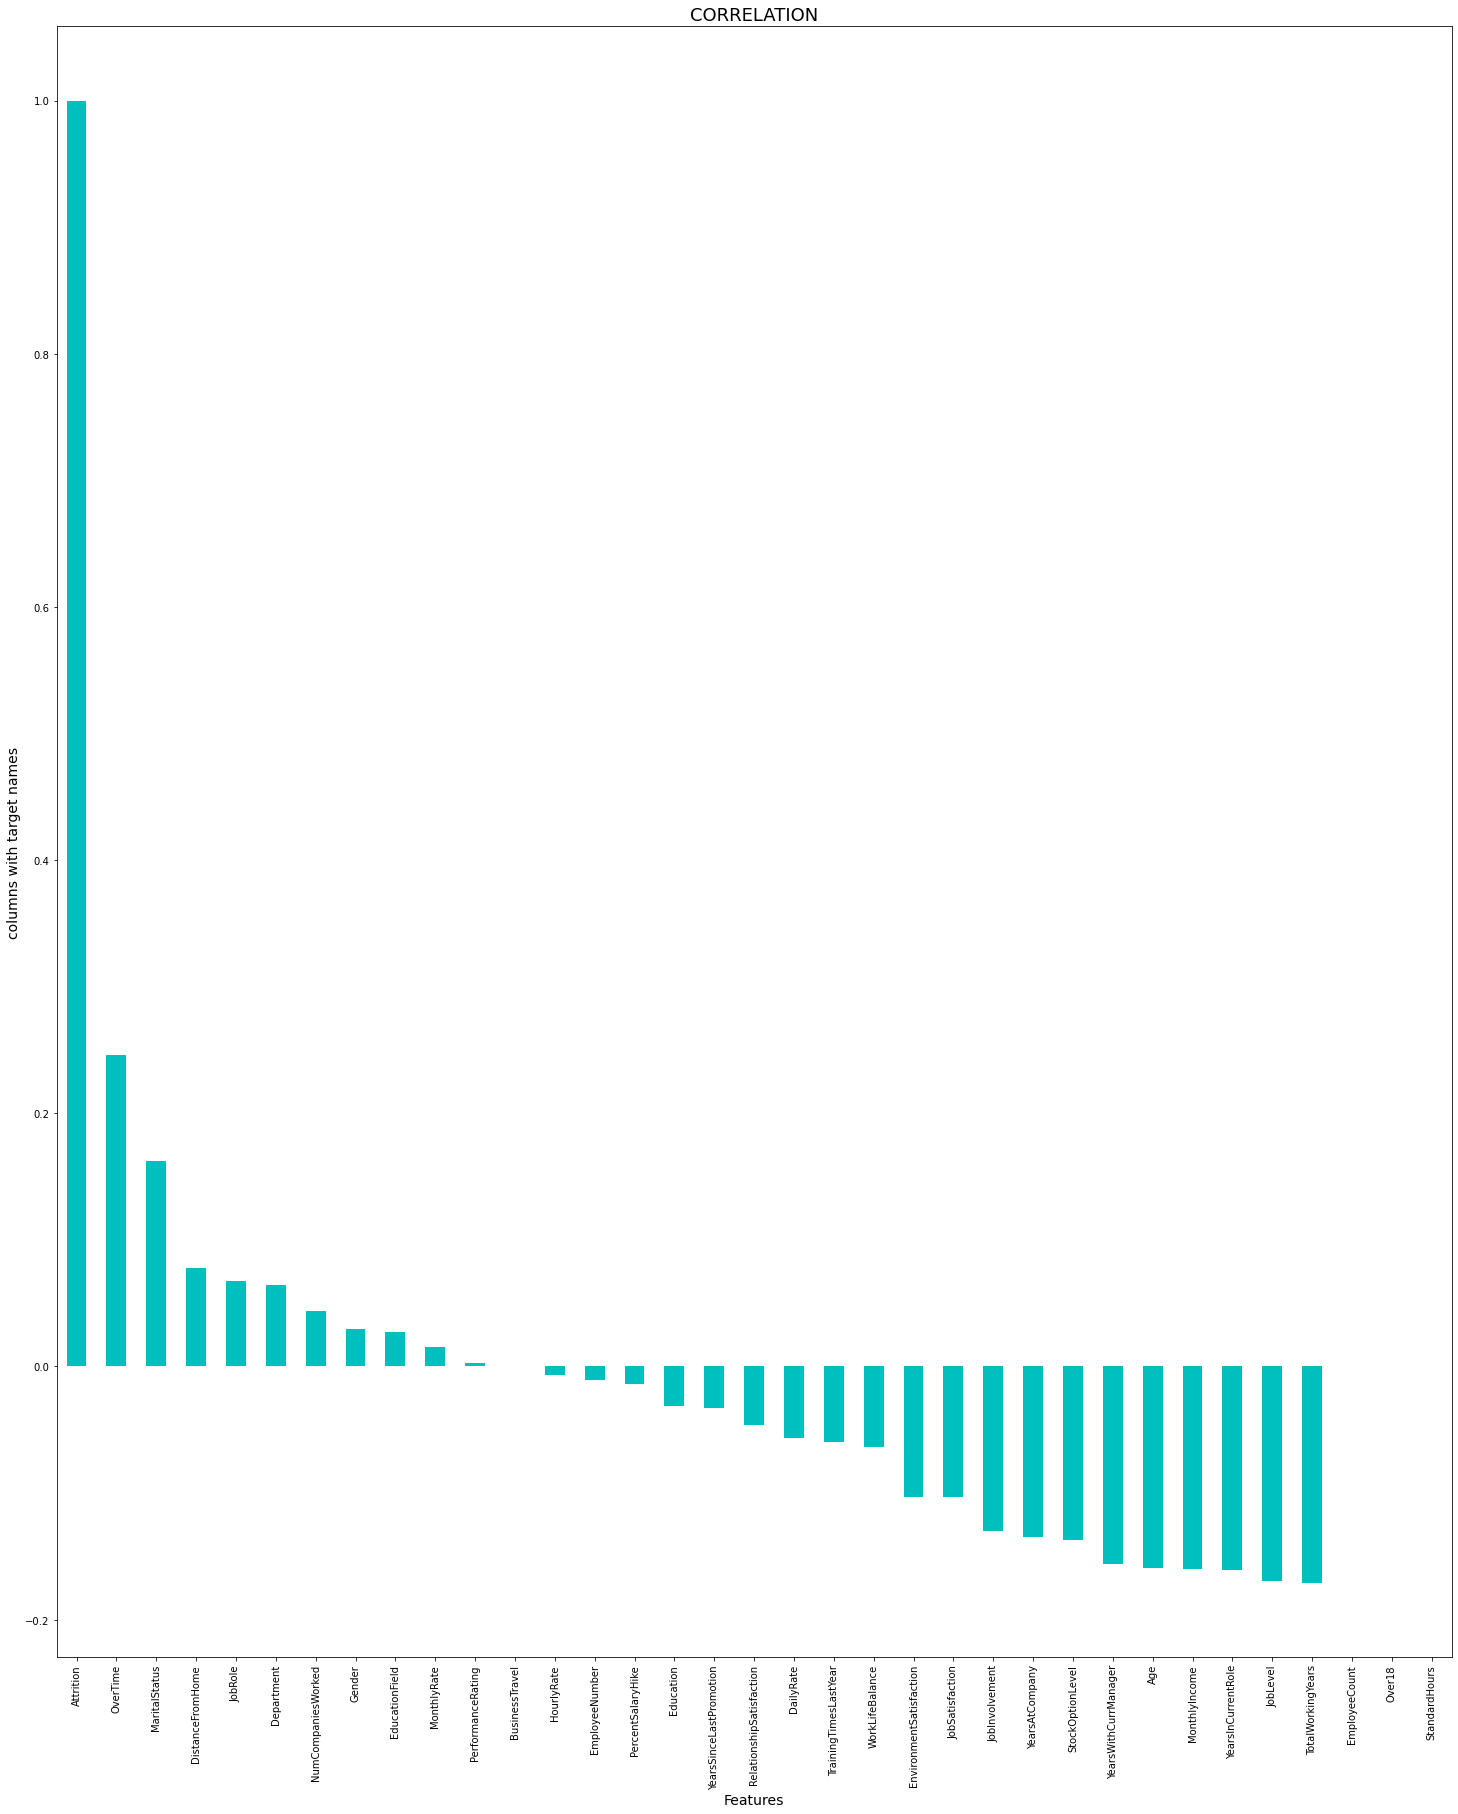

In [41]:
#checking the columns which are positively and negatively correlated
plt.figure(figsize=(25,30))
HR.corr()['Attrition'].sort_values(ascending=False).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('CORRELATION',fontsize=18)
plt.show()

In [42]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in HR.columns:
    if HR[i].dtypes=='object':
        HR[i]=enc.fit_transform(HR[i].values.reshape(-1,1))
HR.tail(20)

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
1450   35        0.0             2.0       1146         0.0                26   
1451   38        0.0             2.0        345         2.0                10   
1452   50        1.0             1.0        878         2.0                 1   
1453   36        0.0             2.0       1120         2.0                11   
1454   45        0.0             2.0        374         2.0                20   
1455   40        0.0             2.0       1322         1.0                 2   
1456   35        0.0             1.0       1199         1.0                18   
1457   40        0.0             2.0       1194         1.0                 2   
1458   35        0.0             2.0        287         1.0                 1   
1459   29        0.0             2.0       1378         1.0                13   
1460   29        0.0             2.0        468         1.0                28   
1461   50        1.0             2.0        410         2.0                28   
1462   39        0.0             2.0        722         2.0                24   
1463   31        0.0             0.0        325         1.0                 5   
1464   26        0.0             2.0       1167         2.0                 5   
1465   36        0.0             1.0        884         1.0                23   
1466   39        0.0             2.0        613         1.0                 6   
1467   27        0.0             2.0        155         1.0                 4   
1468   49        0.0             1.0       1023         2.0                 2   
1469   34        0.0             2.0        628         1.0                 8   

      Education  EducationField  EmployeeCount  EmployeeNumber  ...  \
1450          4             1.0              1            2040  ...   
1451          2             1.0              1            2041  ...   
1452          4             1.0              1            2044  ...   
1453          4             2.0              1            2045  ...   
1454          3             1.0              1            2046  ...   
1455          4             1.0              1            2048  ...   
1456          4             1.0              1            2049  ...   
1457          4             3.0              1            2051  ...   
1458          4             1.0              1            2052  ...   
1459          2             4.0              1            2053  ...   
1460          4             3.0              1            2054  ...   
1461          3             2.0              1            2055  ...   
1462          1             2.0              1            2056  ...   
1463          3             3.0              1            2057  ...   
1464          3             4.0              1            2060  ...   
1465          2             3.0              1            2061  ...   
1466          1             3.0              1            2062  ...   
1467          3             1.0              1            2064  ...   
1468          3             3.0              1            2065  ...   
1469          3             3.0              1            2068  ...   

      RelationshipSatisfaction  StandardHours  StockOptionLevel  \
1450                         3             80                 0   
1451                         3             80                 1   
1452                         4             80                 2   
1453                         1             80                 1   
1454                         3             80                 0   
1455                         4             80                 0   
1456                         4             80                 2   
1457                         2             80                 3   
1458                         4             80                 1   
1459                         1             80                 1   
1460                         2             80                 0   
1461    

In [43]:
HR.corr()

Age  Attrition  BusinessTravel  DailyRate  \
Age                       1.000000  -0.159205        0.024751   0.010661   
Attrition                -0.159205   1.000000        0.000074  -0.056652   
BusinessTravel            0.024751   0.000074        1.000000  -0.004086   
DailyRate                 0.010661  -0.056652       -0.004086   1.000000   
Department               -0.031882   0.063991       -0.009044   0.007109   
DistanceFromHome         -0.001686   0.077924       -0.024469  -0.004985   
Education                 0.208034  -0.031373        0.000757  -0.016806   
EducationField           -0.040873   0.026846        0.023724   0.037709   
EmployeeCount                  NaN        NaN             NaN        NaN   
EmployeeNumber           -0.010145  -0.010577       -0.015578  -0.050990   
EnvironmentSatisfaction   0.010146  -0.103369        0.004174   0.018355   
Gender                   -0.036311   0.029453       -0.032981  -0.011716   
HourlyRate                0.024287  -0.006846        0.026528   0.023381   
JobInvolvement            0.029820  -0.130016        0.039062   0.046135   
JobLevel                  0.509604  -0.169105        0.019311   0.002966   
JobRole                  -0.122427   0.067151        0.002724  -0.009472   
JobSatisfaction          -0.004892  -0.103481       -0.033962   0.030571   
MaritalStatus            -0.095029   0.162070        0.024001  -0.069586   
MonthlyIncome             0.497855  -0.159840        0.034319   0.007707   
MonthlyRate               0.028051   0.015170       -0.014107  -0.032182   
NumCompaniesWorked        0.299635   0.043494        0.020875   0.038153   
Over18                         NaN        NaN             NaN        NaN   
OverTime                  0.028062   0.246118        0.016543   0.009135   
PercentSalaryHike         0.003634  -0.013478       -0.029377   0.022704   
PerformanceRating         0.001904   0.002889       -0.026341   0.000473   
RelationshipSatisfaction  0.053535  -0.045872       -0.035986   0.007846   
StandardHours                  NaN        NaN             NaN        NaN   
StockOptionLevel          0.037510  -0.137145       -0.016727   0.042143   
TotalWorkingYears         0.680381  -0.171063        0.034226   0.014515   
TrainingTimesLastYear    -0.019621  -0.059478        0.015240   0.002453   
WorkLifeBalance          -0.021490  -0.063939       -0.011256  -0.037848   
YearsAtCompany            0.311309  -0.134392       -0.014575  -0.034055   
YearsInCurrentRole        0.212901  -0.160545       -0.011497   0.009932   
YearsSinceLastPromotion   0.216513  -0.033019       -0.032591  -0.033229   
YearsWithCurrManager      0.202089  -0.156199       -0.022636  -0.026363   

                          Department  DistanceFromHome  Education  \
Age                        -0.031882         -0.001686   0.208034   
Attrition                   0.063991          0.077924  -0.031373   
BusinessTravel             -0.009044         -0.024469   0.000757   
DailyRate                   0.007109         -0.004985  -0.016806   
Department                  1.000000          0.017225   0.007996   
DistanceFromHome            0.017225          1.000000   0.021042   
Education                   0.007996          0.021042   1.000000   
EducationField              0.013720          0.002013  -0.039592   
EmployeeCount                    NaN               NaN        NaN   
EmployeeNumber             -0.010895          0.032916   0.042070   
EnvironmentSatisfaction    -0.019395         -0.016075  -0.027128   
Gender                     -0.041583         -0.001851  -0.016547   
HourlyRate                 -0.004144          0.031131   0.016775   
JobInvolvement             -0.024586          0.008783   0.042438   
JobLevel                    0.101963          0.005303   0.101589   
JobRole                     0.662431         -0.001015   0.004236   
JobSatisfaction             0.021001         -0.003669  -0.011296   
MaritalStatus               0.056073         -0.0144

EmployeeCount','StandardHours','Over18','EmployeeNumber' columns are all similar and add no value to the dataset
there is high skewness in few columns like 'years at company','monthly income','distance from home'.

In [44]:
# to check the dataset after dropping 4 columns
HR.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'],axis=1,inplace=True)
HR

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41        1.0             2.0       1102         2.0                 1   
1      49        0.0             1.0        279         1.0                 8   
2      37        1.0             2.0       1373         1.0                 2   
3      33        0.0             1.0       1392         1.0                 3   
4      27        0.0             2.0        591         1.0                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36        0.0             1.0        884         1.0                23   
1466   39        0.0             2.0        613         1.0                 6   
1467   27        0.0             2.0        155         1.0                 4   
1468   49        0.0             1.0       1023         2.0                 2   
1469   34        0.0             2.0        628         1.0                 8   

      Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0             2             1.0                        2     0.0  ...   
1             1             1.0                        3     1.0  ...   
2             2             4.0                        4     1.0  ...   
3             4             1.0                        4     0.0  ...   
4             1             3.0                        1     1.0  ...   
...         ...             ...                      ...     ...  ...   
1465          2             3.0                        3     1.0  ...   
1466          1             3.0                        4     1.0  ...   
1467          3             1.0                        2     1.0  ...   
1468          3             3.0                        4     1.0  ...   
1469          3             3.0                        2     1.0  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3                         2                 0   
3                     3                         3                 0   
4                     3                         4                 1   
...                 ...                       ...               ...   
1465                  3                         3                 1   
1466                  3                         1                 1   
1467                  4                         2                 1   
1468                  3                         4                 0   
1469                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
1465           

# DESCRIPTIVE STATSTICS

In [45]:
HR.describe().T

count          mean          std     min     25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.0   
Attrition                 1470.0      0.161224     0.367863     0.0     0.0   
BusinessTravel            1470.0      1.607483     0.665455     0.0     1.0   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.0   
Department                1470.0      1.260544     0.527792     0.0     1.0   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.0   
Education                 1470.0      2.912925     1.024165     1.0     2.0   
EducationField            1470.0      2.247619     1.331369     0.0     1.0   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.0   
Gender                    1470.0      0.600000     0.490065     0.0     0.0   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.0   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.0   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.0   
JobRole                   1470.0      4.458503     2.461821     0.0     2.0   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.0   
MaritalStatus             1470.0      1.097279     0.730121     0.0     1.0   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.0   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.0   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.0   
OverTime                  1470.0      0.282993     0.450606     0.0     0.0   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.0   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.0   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.0   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.0   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.0   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.0   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.0   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.0   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.0   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.0   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.0   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
Attrition                     0.0      0.00      1.0  
BusinessTravel                2.0      2.00      2.0  
DailyRate                   802.0   1157.00   1499.0  
Department                    1.0      2.00      2.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EducationField                2.0      3.00      5.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
Gender                        1.0      1.00      1.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobRole                       5.0      7.00      8.0  
JobSatisfaction               3.0      4.00      4.0  
MaritalStatus                 1.0      2.00      2.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
OverTime                      0.0      1.00      1.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalan

<AxesSubplot:>

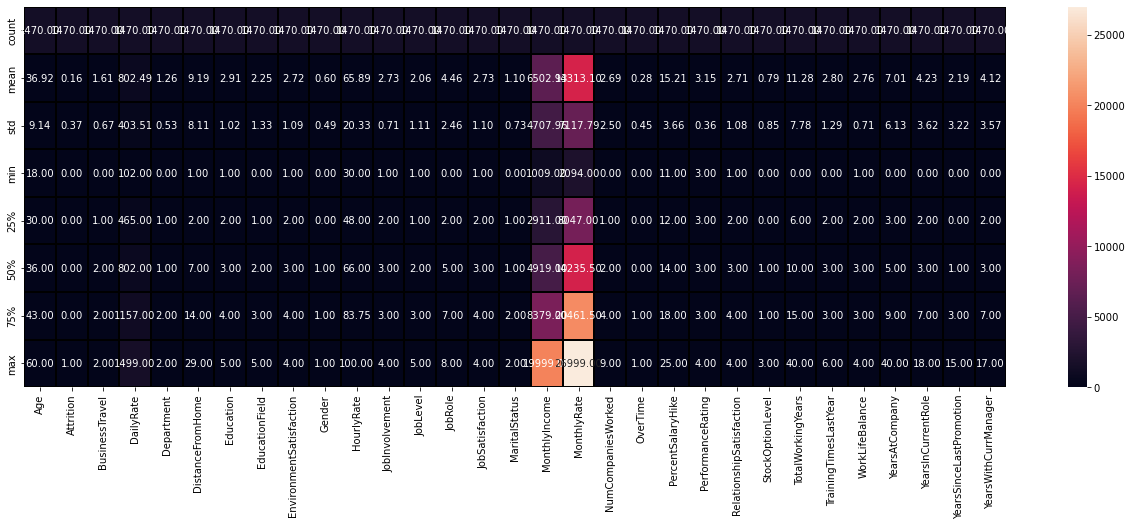

In [46]:
plt.figure(figsize = (22,7))
sns.heatmap(HR.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [47]:
HR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   float64
 2   BusinessTravel            1470 non-null   float64
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   float64
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   float64
 8   EnvironmentSatisfaction   1470 non-null   int64  
 9   Gender                    1470 non-null   float64
 10  HourlyRate                1470 non-null   int64  
 11  JobInvolvement            1470 non-null   int64  
 12  JobLevel                  1470 non-null   int64  
 13  JobRole                   1470 non-null   float64
 14  JobSatis

OUTLIERS CHECKING(Any One outlier method can be  used)

In [48]:
colmlist=HR.columns.values
ncol=30
nrows=14

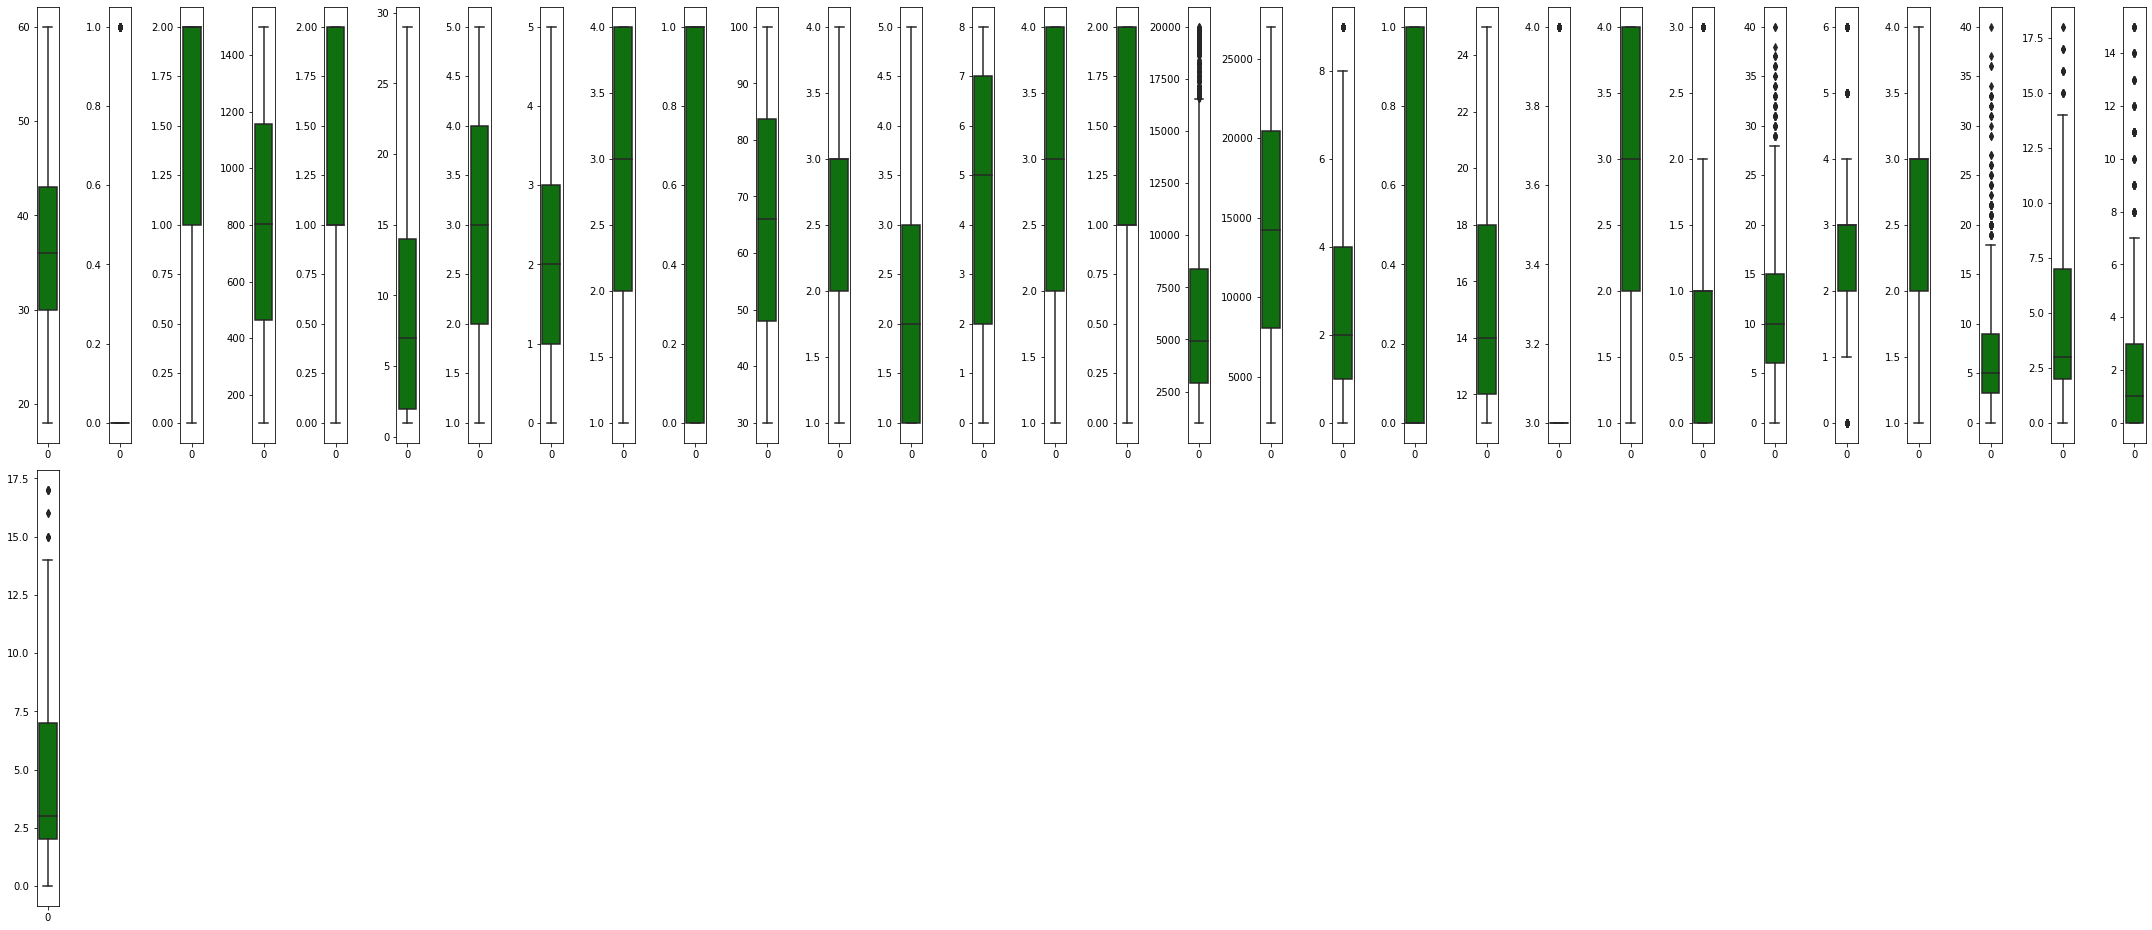

In [49]:
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(colmlist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data= HR[colmlist[i]],color='green',orient='v')
    plt.tight_layout()

Age                            AxesSubplot(0.125,0.125;0.0209459x0.755)
Attrition                   AxesSubplot(0.150135,0.125;0.0209459x0.755)
BusinessTravel               AxesSubplot(0.17527,0.125;0.0209459x0.755)
DailyRate                   AxesSubplot(0.200405,0.125;0.0209459x0.755)
Department                  AxesSubplot(0.225541,0.125;0.0209459x0.755)
DistanceFromHome            AxesSubplot(0.250676,0.125;0.0209459x0.755)
Education                   AxesSubplot(0.275811,0.125;0.0209459x0.755)
EducationField              AxesSubplot(0.300946,0.125;0.0209459x0.755)
EnvironmentSatisfaction     AxesSubplot(0.326081,0.125;0.0209459x0.755)
Gender                      AxesSubplot(0.351216,0.125;0.0209459x0.755)
HourlyRate                  AxesSubplot(0.376351,0.125;0.0209459x0.755)
JobInvolvement              AxesSubplot(0.401486,0.125;0.0209459x0.755)
JobLevel                    AxesSubplot(0.426622,0.125;0.0209459x0.755)
JobRole                     AxesSubplot(0.451757,0.125;0.0209459

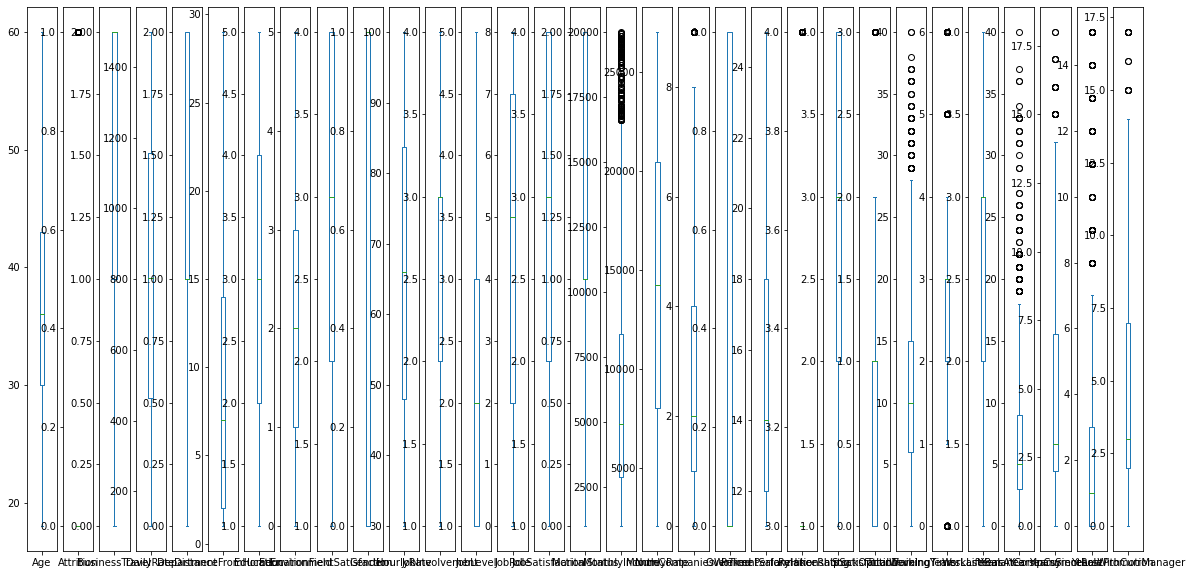

In [50]:
# to find out outliers in the dataset
HR.plot(kind='box',subplots=True,figsize=(20,10))

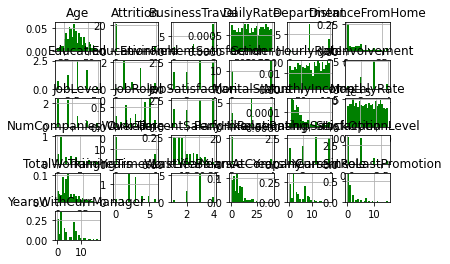

In [51]:
#Lets plot all using Histogram and see the skewness again
 
#plt.rcParams['figure.figsize']=(20,20)
HR.hist(bins=25,color='green',density=True,label='Value',histtype='bar')
plt.show()

WE can see only density and pH are little normally distributed rest all are skewed or unbalanced data
fixed acidity,volatile acidity ,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
Lets take some of the data and do some of the plotting of skewness although we can see all skewed columns on above plotting

<AxesSubplot:xlabel='Attrition', ylabel='Density'>

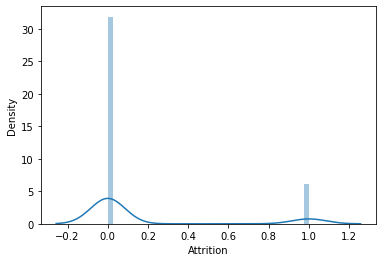

In [52]:
sns.distplot(HR['Attrition'])

<AxesSubplot:xlabel='BusinessTravel', ylabel='Density'>

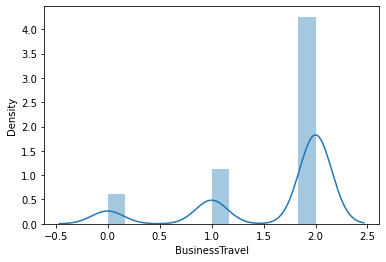

In [53]:
 sns.distplot(HR['BusinessTravel'])
    

<AxesSubplot:xlabel='DailyRate', ylabel='Density'>

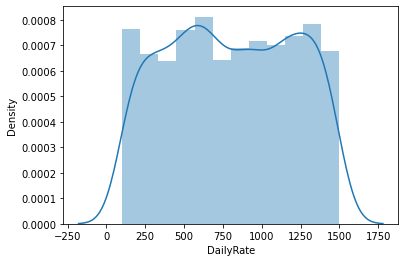

In [54]:
sns.distplot(HR['DailyRate'])
    

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Density'>

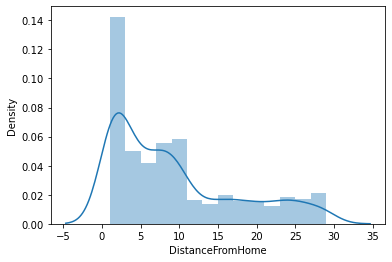

In [55]:
sns.distplot(HR['DistanceFromHome'])

<AxesSubplot:xlabel='Education', ylabel='Density'>

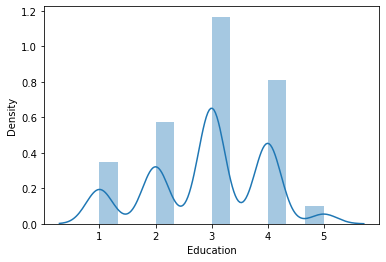

In [56]:
sns.distplot(HR['Education'])

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='Density'>

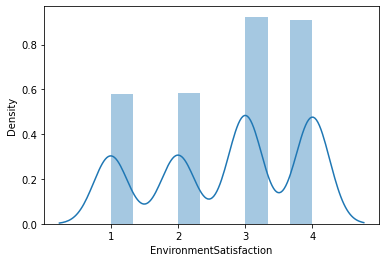

In [57]:
sns.distplot(HR['EnvironmentSatisfaction'])

<AxesSubplot:xlabel='Gender', ylabel='Density'>

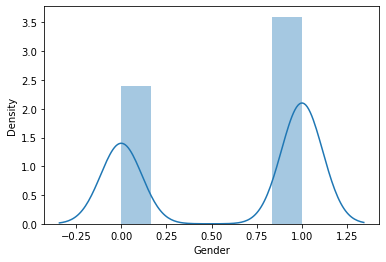

In [58]:
sns.distplot(HR['Gender'])

<AxesSubplot:xlabel='JobSatisfaction', ylabel='Density'>

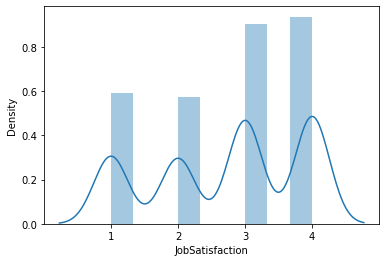

In [59]:
sns.distplot(HR['JobSatisfaction'])

<AxesSubplot:xlabel='MaritalStatus', ylabel='Density'>

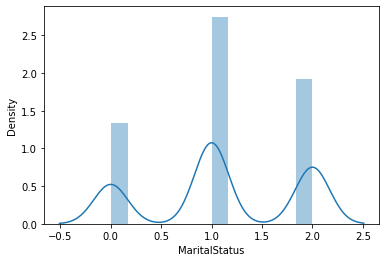

In [60]:
sns.distplot(HR['MaritalStatus'])

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='Density'>

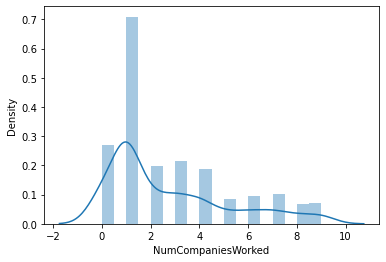

In [61]:
sns.distplot(HR['NumCompaniesWorked'])

<AxesSubplot:xlabel='RelationshipSatisfaction', ylabel='Density'>

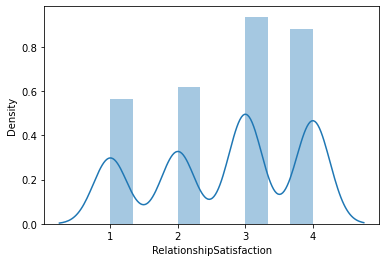

In [62]:
sns.distplot(HR['RelationshipSatisfaction'])

<AxesSubplot:xlabel='BusinessTravel', ylabel='Density'>

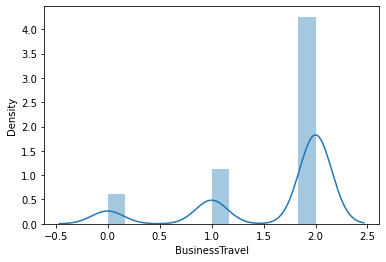

In [63]:
sns.distplot(HR['BusinessTravel'])

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='Density'>

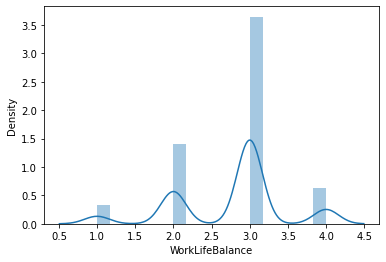

In [64]:
sns.distplot(HR['WorkLifeBalance'])

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='Density'>

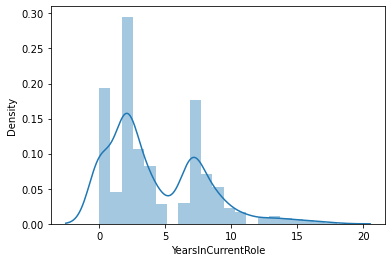

In [65]:
sns.distplot(HR['YearsInCurrentRole'])

<AxesSubplot:xlabel='StockOptionLevel', ylabel='Density'>

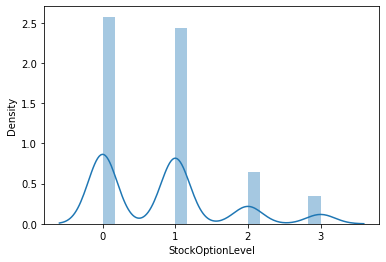

In [66]:
sns.distplot(HR['StockOptionLevel'])

the data of the column is not normalised ...The building block is out of normalized curve..It a right skewed data..
we can see that the data is not normally distributed

Normal distribution curve of outcome column is irrelevent

In [67]:
#to check for outliers through zscore 
from scipy.stats import zscore
(np.abs(zscore( HR)) < 3).all()

Age                          True
Attrition                    True
BusinessTravel               True
DailyRate                    True
Department                   True
DistanceFromHome             True
Education                    True
EducationField               True
EnvironmentSatisfaction      True
Gender                       True
HourlyRate                   True
JobInvolvement               True
JobLevel                     True
JobRole                      True
JobSatisfaction              True
MaritalStatus                True
MonthlyIncome                True
MonthlyRate                  True
NumCompaniesWorked           True
OverTime                     True
PercentSalaryHike            True
PerformanceRating            True
RelationshipSatisfaction     True
StockOptionLevel             True
TotalWorkingYears           False
TrainingTimesLastYear        True
WorkLifeBalance              True
YearsAtCompany              False
YearsInCurrentRole          False
YearsSinceLast

In [68]:
#to remove outliers in data set through zscore
z = np.abs(zscore(HR))
z.shape

(1470, 31)

In [69]:
z

Age  Attrition  BusinessTravel  DailyRate  Department  \
0     0.446350   2.280906        0.590048   0.742527    1.401512   
1     1.322365   0.438422        0.913194   1.297775    0.493817   
2     0.008343   2.280906        0.590048   1.414363    0.493817   
3     0.429664   0.438422        0.913194   1.461466    0.493817   
4     1.086676   0.438422        0.590048   0.524295    0.493817   
...        ...        ...             ...        ...         ...   
1465  0.101159   0.438422        0.913194   0.202082    0.493817   
1466  0.227347   0.438422        0.590048   0.469754    0.493817   
1467  1.086676   0.438422        0.590048   1.605183    0.493817   
1468  1.322365   0.438422        0.913194   0.546677    1.401512   
1469  0.320163   0.438422        0.590048   0.432568    0.493817   

      DistanceFromHome  Education  EducationField  EnvironmentSatisfaction  \
0             1.010909   0.891688        0.937414                 0.660531   
1             0.147150   1.868426        0.937414                 0.254625   
2             0.887515   0.891688        1.316673                 1.169781   
3             0.764121   1.061787        0.937414                 1.169781   
4             0.887515   1.868426        0.565311                 1.575686   
...                ...        ...             ...                      ...   
1465          1.703764   0.891688        0.565311                 0.254625   
1466          0.393938   1.868426        0.565311                 1.169781   
1467          0.640727   0.085049        0.937414                 0.660531   
1468          0.887515   0.085049        0.565311                 1.169781   
1469          0.147150   0.085049        0.565311                 0.660531   

        Gender  ...  PerformanceRating  RelationshipSatisfaction  \
0     1.224745  ...           0.426230                  1.584178   
1     0.816497  ...           2.346151                  1.191438   
2     0.816497  ...           0.426230                  0.658973   
3     1.224745  ...           0.426230                  0.266233   
4     0.816497  ...           0.426230                  1.191438   
...        ...  ...                ...                       ...   
1465  0.816497  ...           0.426230                  0.266233   
1466  0.816497  ...           0.426230                  1.584178   
1467  0.816497  ...           2.346151                  0.658973   
1468  0.816497  ...           0.426230                  1.191438   
1469  0.816497  ...           0.426230                  1.584178   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0             0.932014           0.421642               2.171982   
1             0.241988           0.164511               0.155707   
2             0.932014           0.550208               0.155707   
3             0.932014           0.421642               0.155707   
4             0.241988           0.678774               0.155707   
...                ...                ...                    ...   
1465          0.241988           0.735447               0.155707   
1466          0.241988           0.293077               1.707500   
1467          0.241988           0.678774               2.171982   
1468          0.932014           0.735447               0.155707   
1469          0.932014           0.678774               0.155707   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0            2.493820        0.164613            0.063296   
1            0.338096        0.488508            0.764998   
2            0.338096        1.144294            1.167687   
3            0.338096        0.161947            0.764998   
4            0.338096        0.817734            0.615492   
...               ...             ...                 ...   
1465         0.338096        0.327893            0.615492   
1466         0.338096        0.001333            0.764998   
1467         0.338096        0.164613            0.615492   
1468         

In [70]:
threshold = 3
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([30, 29, 27, 29, 28, 29, 24, 24, 27, 29, 28, 29, 30, 24, 27, 29, 30,
       29, 24, 30, 27, 28, 29, 28, 30, 27, 29, 24, 27, 28, 29, 29, 30, 24,
       27, 27, 29, 29, 24, 28, 27, 27, 29, 27, 30, 29, 27, 24, 27, 29, 30,
       24, 30, 27, 29, 

In [71]:
HR_new=HR[(z<3).all(axis=1)]
print(HR.shape)

(1470, 31)


In [72]:
HR_new.shape

(1387, 31)

In [73]:
print ("Old DataFrame =",HR.shape)
print ("New DataFrame =",HR_new.shape)
print ("Total dropped rows = ",HR.shape[0] - HR_new.shape[0])

Old DataFrame = (1470, 31)
New DataFrame = (1387, 31)
Total dropped rows =  83


In [74]:
#to find % loss in data
loss = (1470-1387)/1470 * 100
print(loss)

5.646258503401361


In [75]:
HR_new

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41        1.0             2.0       1102         2.0                 1   
1      49        0.0             1.0        279         1.0                 8   
2      37        1.0             2.0       1373         1.0                 2   
3      33        0.0             1.0       1392         1.0                 3   
4      27        0.0             2.0        591         1.0                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36        0.0             1.0        884         1.0                23   
1466   39        0.0             2.0        613         1.0                 6   
1467   27        0.0             2.0        155         1.0                 4   
1468   49        0.0             1.0       1023         2.0                 2   
1469   34        0.0             2.0        628         1.0                 8   

      Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0             2             1.0                        2     0.0  ...   
1             1             1.0                        3     1.0  ...   
2             2             4.0                        4     1.0  ...   
3             4             1.0                        4     0.0  ...   
4             1             3.0                        1     1.0  ...   
...         ...             ...                      ...     ...  ...   
1465          2             3.0                        3     1.0  ...   
1466          1             3.0                        4     1.0  ...   
1467          3             1.0                        2     1.0  ...   
1468          3             3.0                        4     1.0  ...   
1469          3             3.0                        2     1.0  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3                         2                 0   
3                     3                         3                 0   
4                     3                         4                 1   
...                 ...                       ...               ...   
1465                  3                         3                 1   
1466                  3                         1                 1   
1467                  4                         2                 1   
1468                  3                         4                 0   
1469                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
1465           

In [76]:
# Independent column
x=HR.drop("Attrition",axis=1)
x

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0      41             2.0       1102         2.0                 1          2   
1      49             1.0        279         1.0                 8          1   
2      37             2.0       1373         1.0                 2          2   
3      33             1.0       1392         1.0                 3          4   
4      27             2.0        591         1.0                 2          1   
...   ...             ...        ...         ...               ...        ...   
1465   36             1.0        884         1.0                23          2   
1466   39             2.0        613         1.0                 6          1   
1467   27             2.0        155         1.0                 4          3   
1468   49             1.0       1023         2.0                 2          3   
1469   34             2.0        628         1.0                 8          3   

      EducationField  EnvironmentSatisfaction  Gender  HourlyRate  ...  \
0                1.0                        2     0.0          94  ...   
1                1.0                        3     1.0          61  ...   
2                4.0                        4     1.0          92  ...   
3                1.0                        4     0.0          56  ...   
4                3.0                        1     1.0          40  ...   
...              ...                      ...     ...         ...  ...   
1465             3.0                        3     1.0          41  ...   
1466             3.0                        4     1.0          42  ...   
1467             1.0                        2     1.0          87  ...   
1468             3.0                        4     1.0          63  ...   
1469             3.0                        2     1.0          82  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3                         2                 0   
3                     3                         3                 0   
4                     3                         4                 1   
...                 ...                       ...               ...   
1465                  3                         3                 1   
1466                  3                         1                 1   
1467                  4                         2                 1   
1468                  3                         4                 0   
1469                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
146

In [77]:
x.shape

(1470, 30)

In [78]:
# Target or dependent variable
y=HR["Attrition"]
y

0       1.0
1       0.0
2       1.0
3       0.0
4       0.0
       ... 
1465    0.0
1466    0.0
1467    0.0
1468    0.0
1469    0.0
Name: Attrition, Length: 1470, dtype: float64

In [79]:
y.shape

(1470,)

# TRANSFORMING DATA TO REMOVE SKEWNESS

# Removing skewness using yeo-johnson  method to get better prediction
#skew = ['DistanceFromHome', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']

#from sklearn.preprocessing import PowerTransformer
#scaler = PowerTransformer(method='yeo-johnson')
'''
#parameters:
#method = 'box-cox' or 'yeo-johnson'
'''

In [80]:
HR

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41        1.0             2.0       1102         2.0                 1   
1      49        0.0             1.0        279         1.0                 8   
2      37        1.0             2.0       1373         1.0                 2   
3      33        0.0             1.0       1392         1.0                 3   
4      27        0.0             2.0        591         1.0                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36        0.0             1.0        884         1.0                23   
1466   39        0.0             2.0        613         1.0                 6   
1467   27        0.0             2.0        155         1.0                 4   
1468   49        0.0             1.0       1023         2.0                 2   
1469   34        0.0             2.0        628         1.0                 8   

      Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0             2             1.0                        2     0.0  ...   
1             1             1.0                        3     1.0  ...   
2             2             4.0                        4     1.0  ...   
3             4             1.0                        4     0.0  ...   
4             1             3.0                        1     1.0  ...   
...         ...             ...                      ...     ...  ...   
1465          2             3.0                        3     1.0  ...   
1466          1             3.0                        4     1.0  ...   
1467          3             1.0                        2     1.0  ...   
1468          3             3.0                        4     1.0  ...   
1469          3             3.0                        2     1.0  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3                         2                 0   
3                     3                         3                 0   
4                     3                         4                 1   
...                 ...                       ...               ...   
1465                  3                         3                 1   
1466                  3                         1                 1   
1467                  4                         2                 1   
1468                  3                         4                 0   
1469                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
1465           

In [81]:
HR.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

In [82]:
from sklearn.preprocessing import power_transform
x_new=power_transform(HR_new,method='yeo-johnson')

In [83]:
pd.DataFrame(x_new).skew()

0    -0.004079
1     1.805983
2    -0.960583
3    -0.199742
4     0.015095
5    -0.008149
6    -0.103747
7    -0.008642
8    -0.205472
9    -0.417296
10   -0.105678
11   -0.018801
12    0.110769
13   -0.337641
14   -0.217730
15   -0.158253
16    0.027700
17   -0.176560
18    0.016175
19    0.954751
20    0.112128
21    0.000000
22   -0.191406
23    0.089929
24   -0.009666
25    0.057949
26   -0.011133
27   -0.025230
28   -0.069631
29    0.212301
30   -0.070570
dtype: float64

In [84]:
# It will be a 2 dimensional data containg rows and columns

from sklearn.preprocessing import StandardScaler
#transforming my dataset into a standard normal distribution
sc=StandardScaler()

x= pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0     0.446350        0.590048   0.742527    1.401512         -1.010909   
1     1.322365       -0.913194  -1.297775   -0.493817         -0.147150   
2     0.008343        0.590048   1.414363   -0.493817         -0.887515   
3    -0.429664       -0.913194   1.461466   -0.493817         -0.764121   
4    -1.086676        0.590048  -0.524295   -0.493817         -0.887515   
...        ...             ...        ...         ...               ...   
1465 -0.101159       -0.913194   0.202082   -0.493817          1.703764   
1466  0.227347        0.590048  -0.469754   -0.493817         -0.393938   
1467 -1.086676        0.590048  -1.605183   -0.493817         -0.640727   
1468  1.322365       -0.913194   0.546677    1.401512         -0.887515   
1469 -0.320163        0.590048  -0.432568   -0.493817         -0.147150   

      Education  EducationField  EnvironmentSatisfaction    Gender  \
0     -0.891688       -0.937414                -0.660531 -1.224745   
1     -1.868426       -0.937414                 0.254625  0.816497   
2     -0.891688        1.316673                 1.169781  0.816497   
3      1.061787       -0.937414                 1.169781 -1.224745   
4     -1.868426        0.565311                -1.575686  0.816497   
...         ...             ...                      ...       ...   
1465  -0.891688        0.565311                 0.254625  0.816497   
1466  -1.868426        0.565311                 1.169781  0.816497   
1467   0.085049       -0.937414                -0.660531  0.816497   
1468   0.085049        0.565311                 1.169781  0.816497   
1469   0.085049        0.565311                -0.660531  0.816497   

      HourlyRate  ...  PerformanceRating  RelationshipSatisfaction  \
0       1.383138  ...          -0.426230                 -1.584178   
1      -0.240677  ...           2.346151                  1.191438   
2       1.284725  ...          -0.426230                 -0.658973   
3      -0.486709  ...          -0.426230                  0.266233   
4      -1.274014  ...          -0.426230                  1.191438   
...          ...  ...                ...                       ...   
1465   -1.224807  ...          -0.426230                  0.266233   
1466   -1.175601  ...          -0.426230                 -1.584178   
1467    1.038693  ...           2.346151                 -0.658973   
1468   -0.142264  ...          -0.426230                  1.191438   
1469    0.792660  ...          -0.426230                 -1.584178   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0            -0.932014          -0.421642              -2.171982   
1             0.241988          -0.164511               0.155707   
2            -0.932014          -0.550208               0.155707   
3            -0.932014          -0.421642               0.155707   
4             0.241988          -0.678774               0.155707   
...                ...                ...                    ...   
1465          0.241988           0.735447               0.155707   
1466          0.241988          -0.293077               1.707500   
1467          0.241988          -0.678774              -2.171982   
1468         -0.932014           0.735447               0.155707   
1469         -0.932014          -0.678774               0.155707   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0           -2.493820       -0.164613           -0.063296   
1            0.338096        0.488508            0.764998   
2            0.338096       -1.144294           -1.167687   
3            0.338096        0.161947            0.764998   
4            0.338096       -0.817734           -0.615492   
...               ...             ...                 ...   
1465         0.338096       -0.327893           -0.615492   
1466         0.338096       -0.001333            0.764998   
1467         0.338096       -0.164613           -0.615492   
1

In [85]:
x.mean()

Age                        -4.017950e-17
BusinessTravel             -1.178196e-17
DailyRate                   7.197568e-17
Department                  3.175842e-17
DistanceFromHome            5.164048e-17
Education                   2.697011e-16
EducationField             -7.310856e-17
EnvironmentSatisfaction     7.054070e-17
Gender                      7.205121e-17
HourlyRate                  1.728021e-16
JobInvolvement             -6.495182e-18
JobLevel                    1.479542e-16
JobRole                    -9.274516e-17
JobSatisfaction            -7.816876e-18
MaritalStatus               1.817141e-16
MonthlyIncome              -5.403841e-17
MonthlyRate                 2.394154e-17
NumCompaniesWorked         -5.588878e-17
OverTime                    2.354881e-16
PercentSalaryHike           2.479498e-16
PerformanceRating          -7.766274e-16
RelationshipSatisfaction   -1.910792e-16
StockOptionLevel            6.600918e-17
TotalWorkingYears          -9.236753e-17
TrainingTimesLas

In [86]:
x.std()

Age                         1.00034
BusinessTravel              1.00034
DailyRate                   1.00034
Department                  1.00034
DistanceFromHome            1.00034
Education                   1.00034
EducationField              1.00034
EnvironmentSatisfaction     1.00034
Gender                      1.00034
HourlyRate                  1.00034
JobInvolvement              1.00034
JobLevel                    1.00034
JobRole                     1.00034
JobSatisfaction             1.00034
MaritalStatus               1.00034
MonthlyIncome               1.00034
MonthlyRate                 1.00034
NumCompaniesWorked          1.00034
OverTime                    1.00034
PercentSalaryHike           1.00034
PerformanceRating           1.00034
RelationshipSatisfaction    1.00034
StockOptionLevel            1.00034
TotalWorkingYears           1.00034
TrainingTimesLastYear       1.00034
WorkLifeBalance             1.00034
YearsAtCompany              1.00034
YearsInCurrentRole          

Balancing the dataset over here,otherwise it will be a baised dataset

In [87]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [88]:
x.shape

(2466, 30)

In [89]:
y.value_counts()

1.0    1233
0.0    1233
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

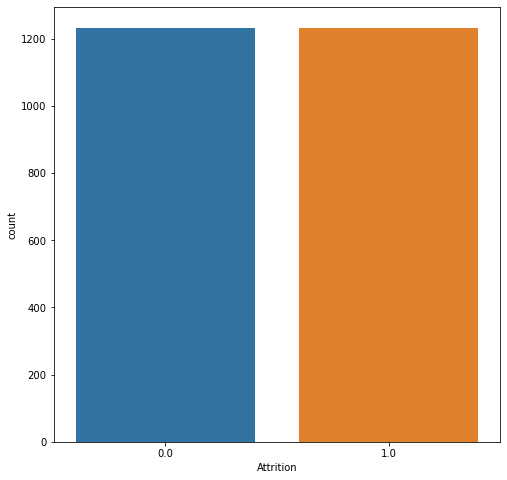

In [90]:
plt.figure(figsize=(8,8))
sns.countplot(y)

WE CHECK MULTICOLLINEARITY BY VARIANCE INFLATION FACTOR (VIF)

In [91]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print (vif)

In [92]:
vif_cal()

    VIF FACTOR                  FEATURES
0     2.254904                       Age
1     1.017205            BusinessTravel
2     1.057724                 DailyRate
3     2.394667                Department
4     1.043967          DistanceFromHome
5     1.064154                 Education
6     1.048931            EducationField
7     1.047245   EnvironmentSatisfaction
8     1.033663                    Gender
9     1.034631                HourlyRate
10    1.042060            JobInvolvement
11   13.325155                  JobLevel
12    2.307539                   JobRole
13    1.045832           JobSatisfaction
14    2.119504             MaritalStatus
15   12.326324             MonthlyIncome
16    1.047355               MonthlyRate
17    1.310147        NumCompaniesWorked
18    1.078498                  OverTime
19    2.794618         PercentSalaryHike
20    2.827645         PerformanceRating
21    1.032804  RelationshipSatisfaction
22    2.045553          StockOptionLevel
23    5.724956  

# No Multicollinearity is present in the dataset...Here we can observe all the columns have VIF less than 10 which means we are free from multicollinearity problem. Let's move to buliding machine learning models...


In [93]:
# to predict best random state value
maxAcc =0
maxRS=0

for i in range(1,11581):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Best accuracy is',maxAcc,'on Random_State',maxRS)

Best accuracy is 0.8441295546558705 on Random_State 1354


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=1354)

In [ ]:
print('shape of x_train:',x_train.shape)
print('shape of y_train:',x_train.shape)
print('shape of x_test:',x_test.shape)
print('shape of y_test:',y_test.shape)

In [96]:
x_train

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
41   -1.086676        0.590048   1.084643   -0.493817         -0.887515   
971   1.541369        0.590048   1.493695   -0.493817          0.223033   
2139 -2.044742       -0.913194  -0.570898    1.401512         -0.671323   
1663  0.962764        0.590048   0.219361    0.318767         -0.182600   
2283  0.153247        0.590048   0.234031   -1.569738          0.296327   
...        ...             ...        ...         ...               ...   
2129 -1.730024       -0.913194  -0.204775    1.401512         -0.023755   
749   1.650871        0.590048  -1.330003    1.401512         -0.887515   
1361 -1.196177       -0.913194   0.727652   -0.493817         -0.393938   
2399 -1.459069        0.590048   1.203139    0.053555          0.766066   
307   0.117845        0.590048   0.115314   -0.493817          1.950552   

      Education  EducationField  EnvironmentSatisfaction    Gender  \
41     1.061787       -0.937414                 1.169781 -1.224745   
971   -0.891688        2.068035                 1.169781 -1.224745   
2139  -0.769264        0.471135                -0.431119 -1.224745   
1663  -0.752463        1.101641                -1.052885 -1.224745   
2283   0.639513        1.418361                -1.575686 -1.224745   
...         ...             ...                      ...       ...   
2129   0.085049       -0.186052                 1.169781 -0.459438   
749   -1.868426       -0.186052                -1.575686 -1.224745   
1361   0.085049        1.316673                 0.254625  0.816497   
2399  -1.304261        1.099679                 0.641186 -0.635233   
307   -0.891688       -0.937414                -1.575686 -1.224745   

      HourlyRate  ...  PerformanceRating  RelationshipSatisfaction  \
41     -1.618459  ...           -0.42623                  1.191438   
971     0.792660  ...           -0.42623                 -0.658973   
2139    0.103501  ...           -0.42623                  0.150267   
1663   -0.662385  ...           -0.42623                  1.191438   
2283   -0.236792  ...           -0.42623                  1.191438   
...          ...  ...                ...                       ...   
2129   -0.972543  ...           -0.42623                 -1.005853   
749    -0.437503  ...           -0.42623                  1.191438   
1361   -0.240677  ...           -0.42623                 -1.584178   
2399    0.297210  ...           -0.42623                 -1.049779   
307     0.743454  ...           -0.42623                  0.266233   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
41            0.241988          -1.321601               2.483396   
971          -0.932014           2.278234              -1.396086   
2139         -0.932014          -1.417938              -0.522938   
1663         -0.428685           2.058039              -1.174033   
2283         -0.424457          -0.748373              -1.501094   
...                ...                ...                    ...   
2129         -0.491855          -1.241238               0.155707   
749           0.241988           2.792496               0.155707   
1361          0.241988          -0.421642               0.155707   
2399         -0.932014          -1.321601               0.155707   
307           0.241988           0.992578              -0.620189   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
41           0.338096       -0.981014           -1.167687   
971         -1.077862       -0.327893           -0.615492   
2139         1.576578       -1.103363           -1.098475   
1663         0.338096        3.147901            2.855409   
2283         0.338096       -0.253006           -0.018664   
...               ...             ...                 ...   
2129        -0.192778       -0.878951           -0.822522   
749          0.338096        4.080672            2.697683   
1361         0.338096       -0.001333            0.764998   
2

In [97]:
y_test

1832    1.0
1237    1.0
212     0.0
2114    1.0
1431    0.0
       ... 
1506    1.0
522     0.0
1482    1.0
973     0.0
1228    0.0
Name: Attrition, Length: 494, dtype: float64

In [98]:
x_test

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
1832 -0.815141       -0.913194  -0.185116   -2.389147          0.152447   
1237 -0.539166        0.590048   0.400410    1.401512         -1.010909   
212  -1.086676       -0.913194   1.089601    1.401512          1.333581   
2114 -0.684101       -0.073172  -0.969290   -0.493817          1.896112   
1431 -0.539166        0.590048  -0.003683    1.401512         -1.010909   
...        ...             ...        ...         ...               ...   
1506 -1.942656       -0.913194  -0.310886    1.401512         -0.326210   
522   0.008343        0.590048   1.047456   -0.493817          0.099639   
1482 -2.055002       -0.913194   1.176914    1.401512         -0.543160   
973  -0.210661        0.590048   0.035982   -0.493817         -1.010909   
1228  0.446350       -2.416437  -0.620980   -2.389147         -0.640727   

      Education  EducationField  EnvironmentSatisfaction    Gender  \
1832   0.085049       -1.688776                -0.062799 -1.224745   
1237  -0.891688       -0.937414                -1.575686  0.816497   
212    0.085049       -0.937414                 1.169781 -1.224745   
2114   0.199928       -0.937414                -0.364406  0.816497   
1431   1.061787       -0.186052                 0.254625 -1.224745   
...         ...             ...                      ...       ...   
1506  -0.313968        0.120895                 0.422061 -1.224745   
522   -0.891688       -0.937414                 1.169781  0.816497   
1482  -0.017172       -0.068100                -0.708419  0.709682   
973    0.085049        0.565311                 1.169781 -1.224745   
1228   0.085049       -1.688776                 0.254625  0.816497   

      HourlyRate  ...  PerformanceRating  RelationshipSatisfaction  \
1832   -0.062914  ...          -0.426230                 -0.054677   
1237   -1.569253  ...          -0.426230                 -0.658973   
212     1.186312  ...          -0.426230                  1.191438   
2114    0.734759  ...           2.346151                 -0.141961   
1431   -0.880361  ...          -0.426230                  0.266233   
...          ...  ...                ...                       ...   
1506   -0.263492  ...          -0.426230                 -0.281007   
522     0.694247  ...          -0.426230                 -1.584178   
1482    0.230222  ...          -0.426230                  1.143024   
973    -0.289883  ...          -0.426230                 -0.658973   
1228   -0.289883  ...          -0.426230                 -0.658973   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
1832          0.038386          -0.790257              -1.902861   
1237         -0.932014          -0.164511              -0.620189   
212          -0.932014          -0.550208              -0.620189   
2114         -0.932014          -1.321601              -0.277869   
1431          1.415991           0.349751               0.155707   
...                ...                ...                    ...   
1506         -0.932014          -1.298079              -0.161263   
522          -0.932014          -0.935905              -0.620189   
1482         -0.932014          -1.429984               0.155707   
973           0.241988          -0.164511              -2.171982   
1228          0.241988          -0.164511               0.931603   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
1832        -0.832298       -0.576125           -0.711257   
1237         0.338096       -1.144294           -1.167687   
212          0.338096       -0.001333            0.764998   
2114        -1.869110       -0.981014           -1.167687   
1431         0.338096        1.141629            1.593291   
...               ...             ...                 ...   
1506         0.916544       -0.951141           -0.841075   
522          0.338096       -0.981014           -1.167687   
1482         0.338096       -1.118662           -1.138792   
9

In [99]:
y_train

41      0.0
971     0.0
2139    1.0
1663    1.0
2283    1.0
       ... 
2129    1.0
749     1.0
1361    0.0
2399    1.0
307     0.0
Name: Attrition, Length: 1972, dtype: float64

CROSS VALIDATION FOR LOGISTICS REGRESSION,ENSEMBLE TECHNIQUE(GradientBoostingClassifier,RandomForestClassifier)

In [100]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
gb = GradientBoostingClassifier()
RF = RandomForestClassifier()
ada = AdaBoostClassifier()

model=[lg,gnb,svc,dtc,knn,RF,gb,ada]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy_score:",m,'is')
    print(confusion_matrix(y_test, predm))
    print(accuracy_score(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy_score: LogisticRegression() is
[[204  46]
 [ 43 201]]
0.819838056680162
              precision    recall  f1-score   support

         0.0       0.83      0.82      0.82       250
         1.0       0.81      0.82      0.82       244

    accuracy                           0.82       494
   macro avg       0.82      0.82      0.82       494
weighted avg       0.82      0.82      0.82       494



Accuracy_score: GaussianNB() is
[[162  88]
 [ 41 203]]
0.7388663967611336
              precision    recall  f1-score   support

         0.0       0.80      0.65      0.72       250
         1.0       0.70      0.83      0.76       244

    accuracy                           0.74       494
   macro avg       0.75      0.74      0.74       494
weighted avg       0.75      0.74      0.74       494



Accuracy_score: SVC() is
[[231  19]
 [ 10 234]]
0.9412955465587044
              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94       250
         1.

In [101]:
#cross validation to check the accuracy score
print('cross validation score of random forest model = ', cross_val_score(RF,x,y,cv=None).mean())
print('cross validation score of logistic regression model = ', cross_val_score(lg,x,y,cv=None).mean())
print('cross validation score of decison tree model = ', cross_val_score(dtc,x,y,cv=None).mean())
print('cross validation score of  KNeighborsClassifier model = ', cross_val_score(knn,x,y,cv=None).mean())
print('cross validation score of standard vector machine model = ', cross_val_score(svc,x,y,cv=None).mean())
print('cross validation score of GaussianNB model = ', cross_val_score(gnb,x,y,cv=None).mean())
print('cross validation score of GradientBoostingClassifier model = ',cross_val_score(gb,x,y,cv=None).mean())
print('cross validation score of AdaBoostingClassifier model = ',cross_val_score(ada,x,y,cv=None).mean())

cross validation score of random forest model =  0.9368035082244541
cross validation score of logistic regression model =  0.7899343850342035
cross validation score of decison tree model =  0.8447380739256474
cross validation score of  KNeighborsClassifier model =  0.8175230555715235
cross validation score of standard vector machine model =  0.9176897619301805
cross validation score of GaussianNB model =  0.7047950661487545
cross validation score of GradientBoostingClassifier model =  0.8865838335892782
cross validation score of AdaBoostingClassifier model =  0.8792528598763253


Hyper parameter tuning

Plotting ROC and compare AUC for all the models used

In [102]:
# hyperparameter tuning with RandomForestClassifier, parameters of RandomForestClassifier
parameters ={'n_estimators':[200], 'criterion':['gini'], 
             'min_samples_split':[5], 'min_samples_leaf':[2], 
              'bootstrap':[True],'n_jobs':[-1], 'random_state':[504]}


In [103]:
# hyperparameter tuning with gridsearchCV
gcv = GridSearchCV(RandomForestClassifier(random_state=10637), parameters, verbose=1, cv=10, n_jobs=-1)

In [1]:
#training the model
gcv.fit(x_train,y_train)

NameError: name 'gcv' is not defined

In [105]:
#finding out which parameter is giving best accuracy
gcv.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200,
 'n_jobs': -1,
 'random_state': 504}

In [106]:
type(gcv)

sklearn.model_selection._search.GridSearchCV

In [107]:
# finding best estimator
gcv.best_estimator_

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=504)

In [108]:
# Applying the parameters to the final model
pred = gcv.best_estimator_.predict(x_test)
acc =accuracy_score(y_test,pred)
print(acc*100)

95.34412955465586


ROC AUC Scores

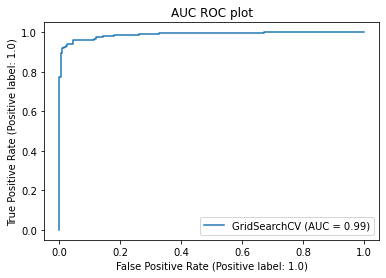

In [135]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(gcv, x_test, y_test)
#rfc_disp = RocCurveDisplay.from_estimator(rfc, x_test, y_test, ax=svc_disp.ax_)
plt.title("AUC ROC plot")
plt.show()

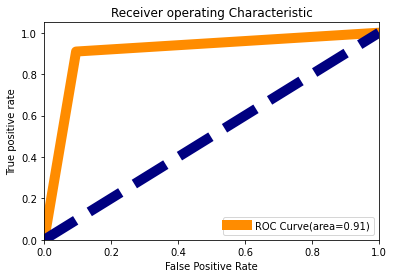

In [122]:
gsv=GridSearchCV
m.fit(x_train,y_train)
y_pred=m.predict(x_test)
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_pred,y_test)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC Curve(area=%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [110]:
#saving the model
import joblib
joblib.dump(gcv,' HR ATTRITION.pkl')

[' HR ATTRITION.pkl']

In [111]:
#Loading the saved model
HA=joblib.load(' HR ATTRITION.pkl')

In [112]:
prediction = HA.predict(x_test)
prediction

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 0.

In [113]:
pd.DataFrame([HA.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

0    1    2    3    4    5    6    7    8    9    ...  484  485  \
Predicted  1.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  ...  0.0  0.0   
Original   1.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  ...  1.0  0.0   

           486  487  488  489  490  491  492  493  
Predicted  1.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  
Original   1.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  

[2 rows x 494 columns]

Let's now make the prediction on test dataset

In [137]:
import pickle
filename = ' HR ATTRITION.pkl'
pickle.dump(gcv,open(filename, 'wb'))

In [138]:
loaded_model = pickle.load(open(filename, 'rb'))
predicted = loaded_model.score(x_test,y_test)*100
print(predicted)

95.34412955465586
